# Imports

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

sns.set_style('darkgrid')
plt.style.use('ggplot')

## Load df_cleaned

In [3]:
path = '/home/edilson07/projects/rp_housing/notebooks/'

df = pd.read_csv(path + 'gtp_analysis.csv')

In [4]:
df.shape

(39860, 13)

In [5]:
df.head()

,nome,preco,quartos,garagem,area,banheiros,condominio,link,tipo,bairro,latitude,longitude,regiao
0,"Vendo apartamento MRV (rio amazonas 1º andar, ...",180000.0,2,1,50,1,205.0,https://sp.olx.com.br/regiao-de-sao-jose-do-ri...,apartamento,Centro,-20.811819,-49.380169,Centro
1,Apartamento para venda em Jardim Santa Lúcia d...,150000.0,2,1,56,1,220.0,https://sp.olx.com.br/regiao-de-sao-jose-do-ri...,apartamento,Jardim Santa Lúcia,-20.799167,-49.404038,Cidade das Crianças
2,Apartamento para venda em Centenário Da Emanci...,140000.0,2,1,52,2,0.0,https://sp.olx.com.br/regiao-de-sao-jose-do-ri...,apartamento,Centenário da Emancipação,-20.763314,-49.381182,CEU
3,Apartamento para venda em Jardim Yolanda de 48...,170000.0,2,1,48,1,240.0,https://sp.olx.com.br/regiao-de-sao-jose-do-ri...,apartamento,Jardim Yolanda,-20.803619,-49.348818,Represa
4,Apartamento para venda em Eldorado de 60.00m² ...,128000.0,2,1,60,1,0.0,https://sp.olx.com.br/regiao-de-sao-jose-do-ri...,apartamento,Eldorado,-20.790599,-49.403592,Cidade das Crianças


# df_cleaned Description

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39860 entries, 0 to 39859
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   nome        39860 non-null  object 
 1   preco       39860 non-null  float64
 2   quartos     39860 non-null  int64  
 3   garagem     39860 non-null  int64  
 4   area        39860 non-null  int64  
 5   banheiros   39860 non-null  int64  
 6   condominio  39860 non-null  float64
 7   link        39860 non-null  object 
 8   tipo        39860 non-null  object 
 9   bairro      39860 non-null  object 
 10  latitude    39860 non-null  float64
 11  longitude   39860 non-null  float64
 12  regiao      39860 non-null  object 
dtypes: float64(4), int64(4), object(5)
memory usage: 4.0+ MB


In [7]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [8]:
df.describe()

,preco,quartos,garagem,area,banheiros,condominio,latitude,longitude
count,39860.00,39860.00,39860.00,39860.00,39860.00,39860.00,39860.00,39860.00
mean,886400.61,2.82,2.47,201.52,2.86,205.86,-20.81,-49.37
std,990851.11,0.75,1.27,2359.17,1.43,250.49,0.03,0.03
min,15000.00,1.00,1.00,10.00,1.00,0.00,-20.90,-49.46
25%,290000.00,2.00,1.00,80.00,2.00,0.00,-20.83,-49.39
50%,500000.00,3.00,2.00,140.00,3.00,1.80,-20.81,-49.38
75%,1150000.00,3.00,4.00,225.00,4.00,380.00,-20.80,-49.35
max,17000000.00,5.00,5.00,276161.00,5.00,995.00,-20.71,-49.29


In [9]:
df['bairro'] = df['bairro'].apply(lambda x: x.strip())

## EDA

In [10]:
df.query("bairro == 'Santos Dumont' and tipo == 'apartamento'")

,nome,preco,quartos,garagem,area,banheiros,condominio,link,tipo,bairro,latitude,longitude,regiao
7206,Apartamento para venda em Alto Rio Preto Resid...,380000.00,2,1,57,2,0.00,https://sp.olx.com.br/regiao-de-sao-jose-do-ri...,apartamento,Santos Dumont,-20.82,-49.40,Centro
7214,Apartamento para venda em Santos Dumont de 82....,330000.00,2,2,82,1,0.00,https://sp.olx.com.br/regiao-de-sao-jose-do-ri...,apartamento,Santos Dumont,-20.82,-49.40,Centro
7250,"Apartamento com 2 dormitórios à venda, 57 m² p...",359000.00,2,1,58,2,360.00,https://sp.olx.com.br/regiao-de-sao-jose-do-ri...,apartamento,Santos Dumont,-20.82,-49.40,Centro
7251,"Apartamento com 2 dormitórios à venda, 57 m² p...",349000.00,2,1,58,2,360.00,https://sp.olx.com.br/regiao-de-sao-jose-do-ri...,apartamento,Santos Dumont,-20.82,-49.40,Centro
7259,"Apartamento com 2 dormitórios à venda, 57 m² p...",320000.00,2,1,57,2,400.00,https://sp.olx.com.br/regiao-de-sao-jose-do-ri...,apartamento,Santos Dumont,-20.82,-49.40,Centro
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15370,Apartamento Cobertura em São José do Rio Preto,500000.00,2,1,57,2,280.00,https://sp.olx.com.br/regiao-de-sao-jose-do-ri...,apartamento,Santos Dumont,-20.82,-49.40,Centro
15398,Apartamento Padrão em São José do Rio Preto,670000.00,3,3,145,4,863.00,https://sp.olx.com.br/regiao-de-sao-jose-do-ri...,apartamento,Santos Dumont,-20.82,-49.40,Centro
15421,Apartamento Cobertura em São José do Rio Preto,500000.00,2,1,57,2,280.00,https://sp.olx.com.br/regiao-de-sao-jose-do-ri...,apartamento,Santos Dumont,-20.82,-49.40,Centro
15445,Apartamento Cobertura em São José do Rio Preto,1300000.00,4,5,217,4,1.90,https://sp.olx.com.br/regiao-de-sao-jose-do-ri...,apartamento,Santos Dumont,-20.82,-49.40,Centro


In [11]:
print(df.loc[df.index == 7214,:]['link'].values[0])

https://sp.olx.com.br/regiao-de-sao-jose-do-rio-preto/imoveis/apartamento-para-venda-em-santos-dumont-de-82-00m-com-2-quartos-1-suite-e-2-garagens-1239432735


## Target Variable(Price)

<Axes: xlabel='preco', ylabel='Count'>

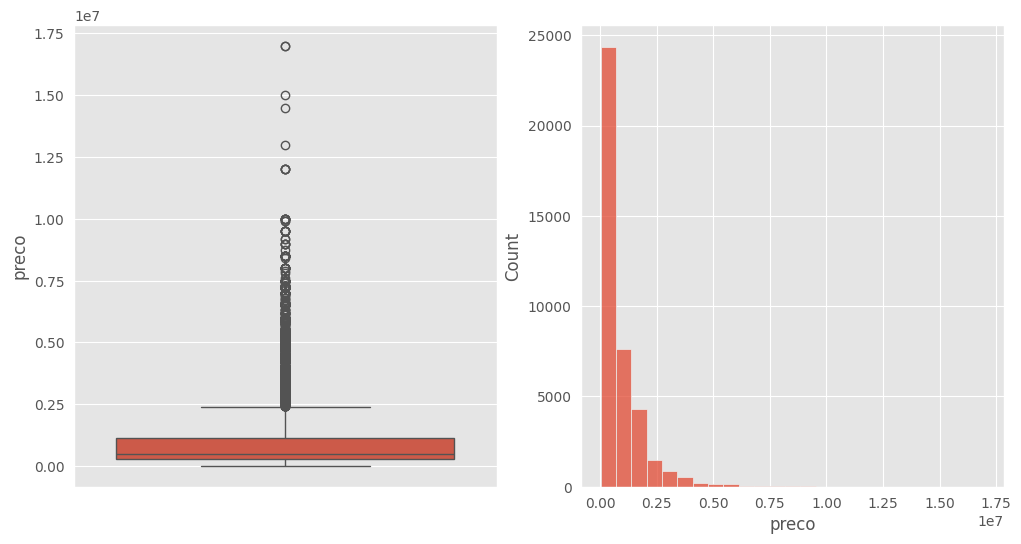

In [12]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.boxplot(df['preco'])

plt.subplot(1,2,2)
sns.histplot(df['preco'], bins=25)

In [13]:
# Calculando o IQR para a coluna 'preco'
Q1 = df['preco'].quantile(0.25)
Q3 = df['preco'].quantile(0.75)
IQR = Q3 - Q1

# Definindo os limites inferior e superior
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filtrando o df_cleanedset para remover outliers
df_precoiqr = df[(df['preco'] >= lower_limit) & (df['preco'] <= upper_limit)]

## Box e hist após remoção de outliers

<Axes: xlabel='preco', ylabel='Count'>

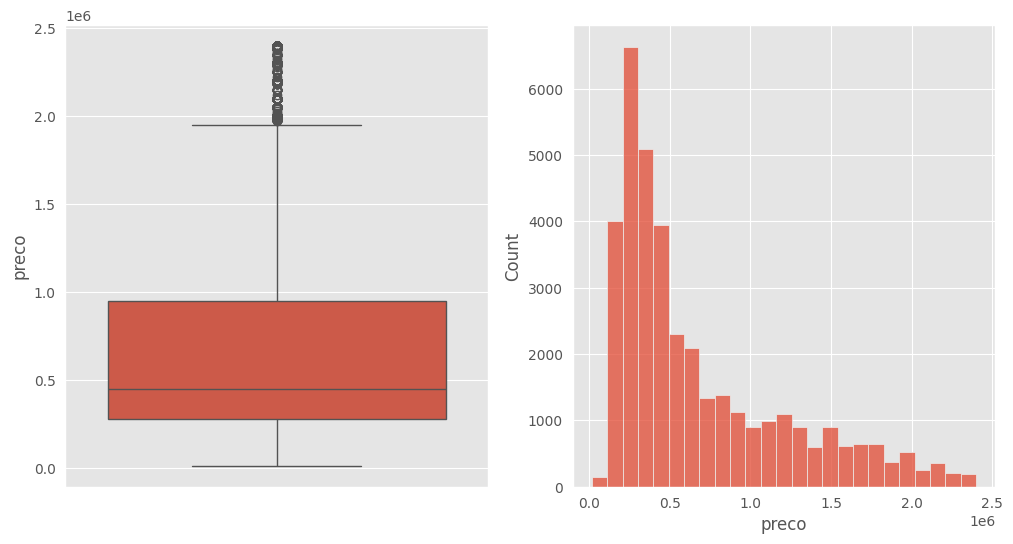

In [14]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.boxplot(df_precoiqr['preco'])

plt.subplot(1,2,2)
sns.histplot(df_precoiqr['preco'], bins=25)

In [15]:
#Apply log on price
df_precoiqr['preco'] = np.sqrt(df_precoiqr['preco'])

/tmp/ipykernel_1913/2413000008.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_precoiqr['preco'] = np.sqrt(df_precoiqr['preco'])


## Area outlier

<Axes: xlabel='area', ylabel='Count'>

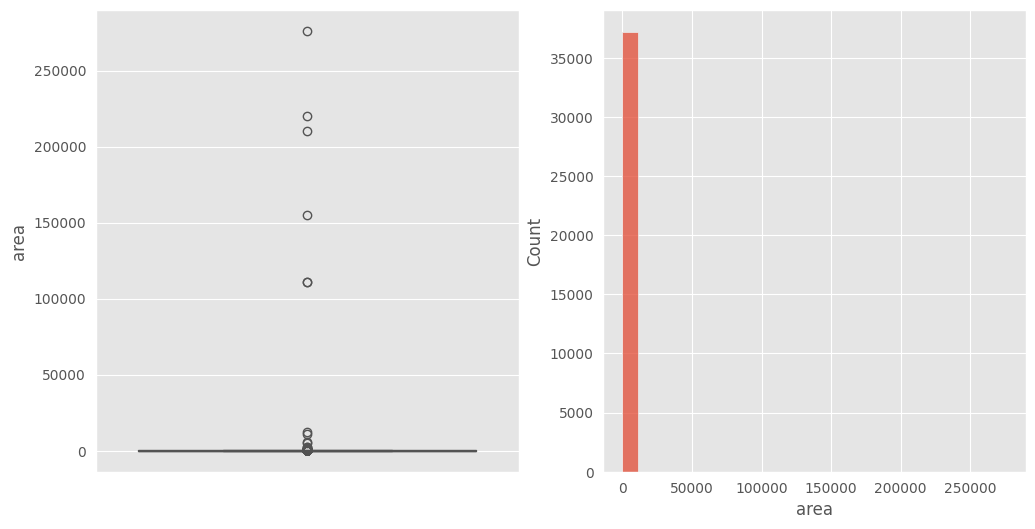

In [16]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.boxplot(df_precoiqr['area'])

plt.subplot(1,2,2)
sns.histplot(df_precoiqr['area'], bins=25)

In [17]:
# Calculando o IQR para a coluna 'area'
Q1 = df['area'].quantile(0.25)
Q3 = df['area'].quantile(0.75)
IQR = Q3 - Q1

# Definindo os limites para outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrando os dados para remover outliers
df_areaiqr = df_precoiqr[(df_precoiqr['area'] >= lower_bound) & (df_precoiqr['area'] <= upper_bound)]

## Pós remoção

<Axes: xlabel='area', ylabel='Count'>

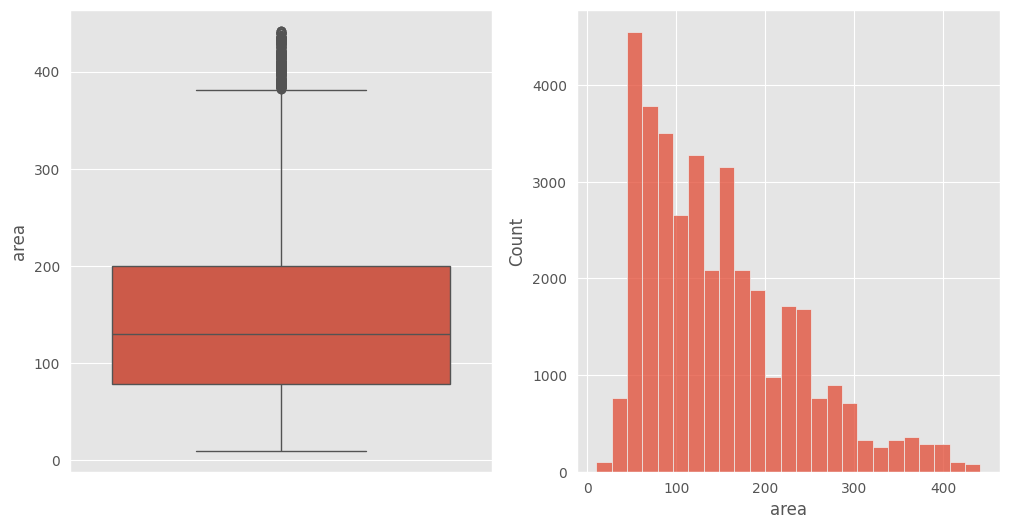

In [18]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.boxplot(df_areaiqr['area'])

plt.subplot(1,2,2)
sns.histplot(df_areaiqr['area'], bins=25)

## Condominio outlier

<Axes: xlabel='condominio', ylabel='Count'>

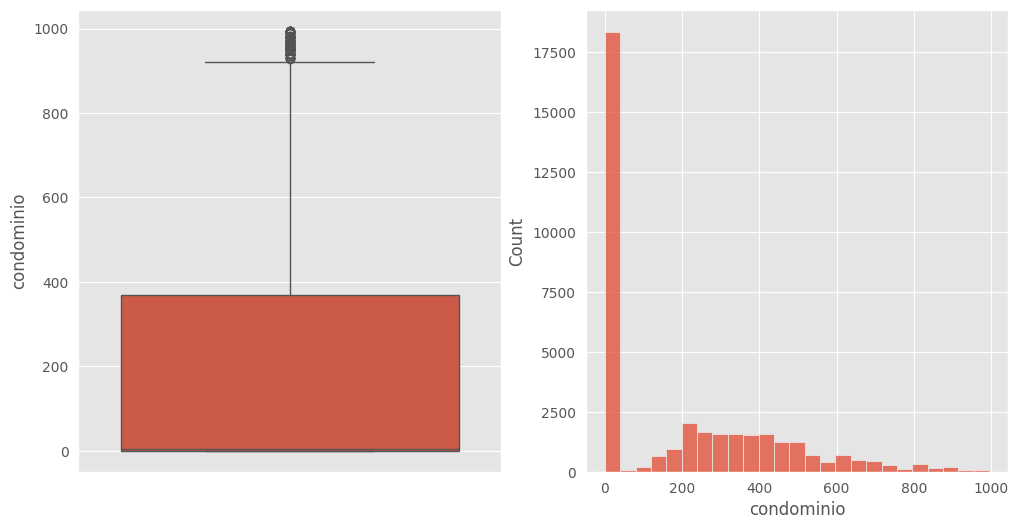

In [19]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.boxplot(df_areaiqr['condominio'])

plt.subplot(1,2,2)
sns.histplot(df_areaiqr['condominio'], bins=25)

Lets try to fill 0 condos with some cases

In [20]:
df_areaiqr['condominio'] = df_areaiqr['condominio'].apply(lambda x: np.nan if x == 0 else x)

/tmp/ipykernel_1913/379094777.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_areaiqr['condominio'] = df_areaiqr['condominio'].apply(lambda x: np.nan if x == 0 else x)


In [21]:
df_areaiqr.loc[:,['condominio','tipo','regiao']].groupby(['regiao','tipo']).mean().reset_index()

,regiao,tipo,condominio
0,BOSQUE,apartamento,257.55
1,BOSQUE,casa,269.43
2,CEU,apartamento,220.98
3,CEU,casa,88.00
4,Centro,apartamento,389.44
5,Centro,casa,370.26
6,Cidade das Crianças,apartamento,221.59
7,Cidade das Crianças,casa,317.27
8,HB,apartamento,375.92
9,HB,casa,425.62


In [22]:
# Criando o df_cleanedFrame condominio_medio
df_cleaned_condominio = {
    'regiao': ['BOSQUE', 'BOSQUE', 'CEU', 'CEU', 'Centro', 'Centro', 'Cidade das Crianças', 'Cidade das Crianças', 'HB', 'HB', 
               'Pinheirinho', 'Pinheirinho', 'Represa', 'Represa', 'Schimidt', 'Schimidt', 'Talhados', 'Talhados', 
               'Vila Toninho', 'Vila Toninho'],
    'tipo': ['apartamento', 'casa', 'apartamento', 'casa', 'apartamento', 'casa', 'apartamento', 'casa', 'apartamento', 'casa', 
             'apartamento', 'casa', 'apartamento', 'casa', 'apartamento', 'casa', 'apartamento', 'casa', 'apartamento', 'casa'],
    'condominio': [257.55, 269.43, 220.98, 88.00, 391.81, 364.50, 221.59, 290.30, 377.90, 425.53, 218.75, 235.32, 240.38, 384.28, 
                   122.23, 372.88, 215.29, 323.93, 263.84, 374.02]
}

condominio_medio = pd.DataFrame(df_cleaned_condominio)

# Função para preencher valores NaN com base em tipo e região
def fill_condominio(row):
    if pd.isna(row['condominio']):
        return condominio_medio.loc[(condominio_medio['regiao'] == row['regiao']) & 
                                    (condominio_medio['tipo'] == row['tipo']), 'condominio'].values[0]
    else:
        return row['condominio']

In [23]:
#Fill na by region and by type
df_areaiqr['condominio'] = df_areaiqr.apply(fill_condominio, axis=1)


/tmp/ipykernel_1913/3435842397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_areaiqr['condominio'] = df_areaiqr.apply(fill_condominio, axis=1)


<Axes: xlabel='condominio', ylabel='Count'>

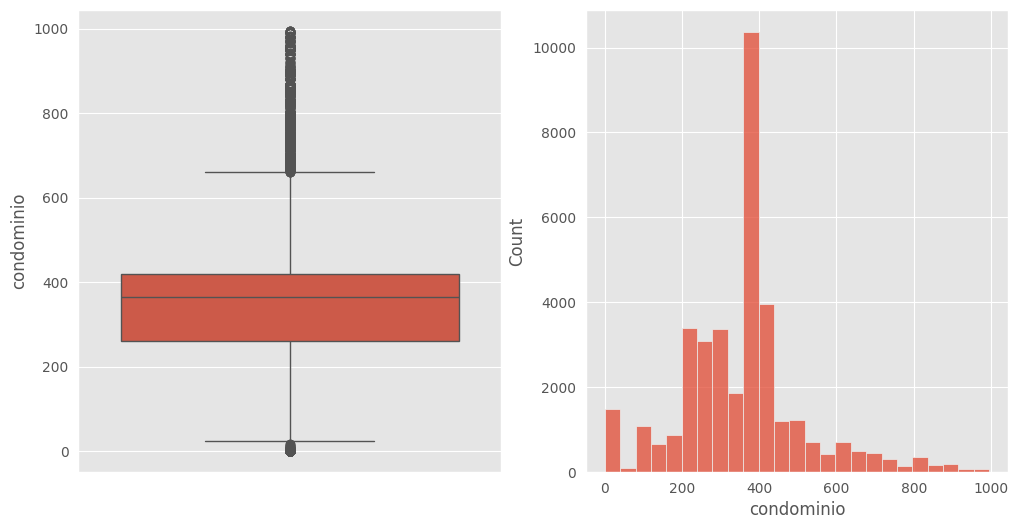

In [24]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.boxplot(df_areaiqr['condominio'])

plt.subplot(1,2,2)
sns.histplot(df_areaiqr['condominio'], bins=25)

In [25]:
# Calculando o IQR para a coluna 'area'
Q1 = df['condominio'].quantile(0.25)
Q3 = df['condominio'].quantile(0.75)
IQR = Q3 - Q1

# Definindo os limites para outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrando os dados para remover outliers
df_condoiqr = df_areaiqr[(df_areaiqr['condominio'] >= lower_bound) & (df_areaiqr['condominio'] <= upper_bound)]

<Axes: xlabel='condominio', ylabel='Count'>

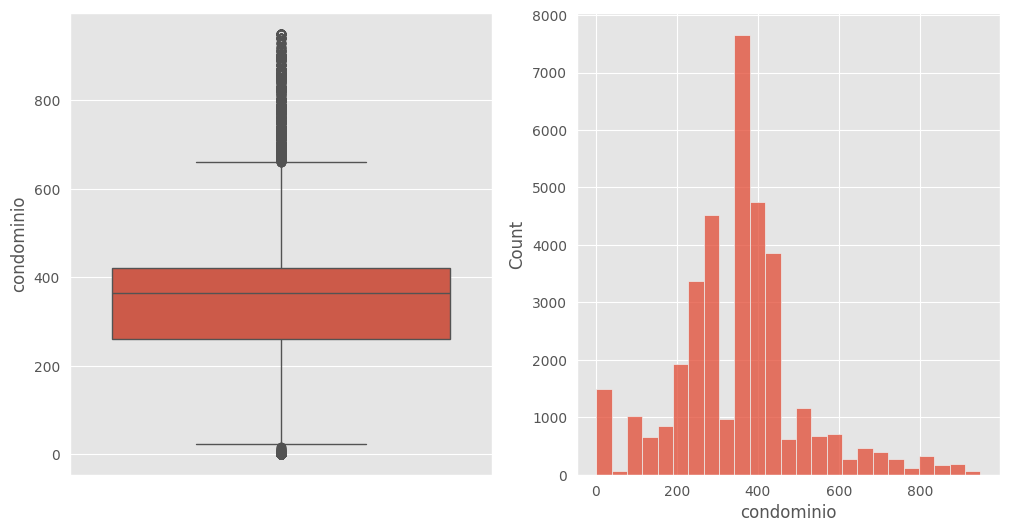

In [26]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.boxplot(df_condoiqr['condominio'])

plt.subplot(1,2,2)
sns.histplot(df_condoiqr['condominio'], bins=25)

# EDA

In [27]:
df_cleaned = df_condoiqr.copy()

In [28]:
df_corr = df_cleaned.drop(['link', 'nome','bairro','regiao'], axis=1)
df_corr['tipo'] = df_corr['tipo'].apply(lambda x: 0 if x == 'apartamento' else 1)

<Axes: >

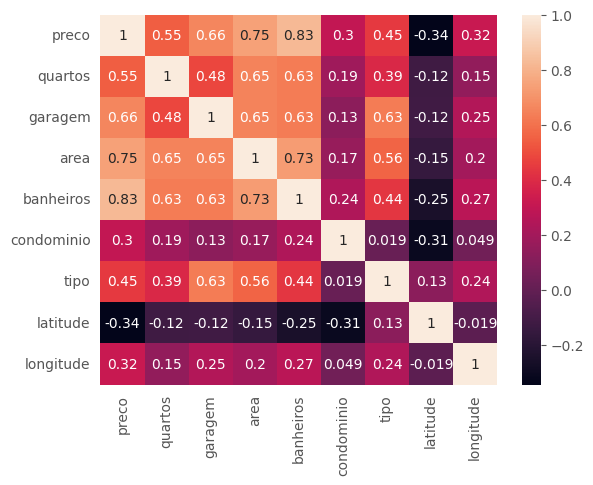

In [29]:
sns.heatmap(df_corr.corr(), annot=True)

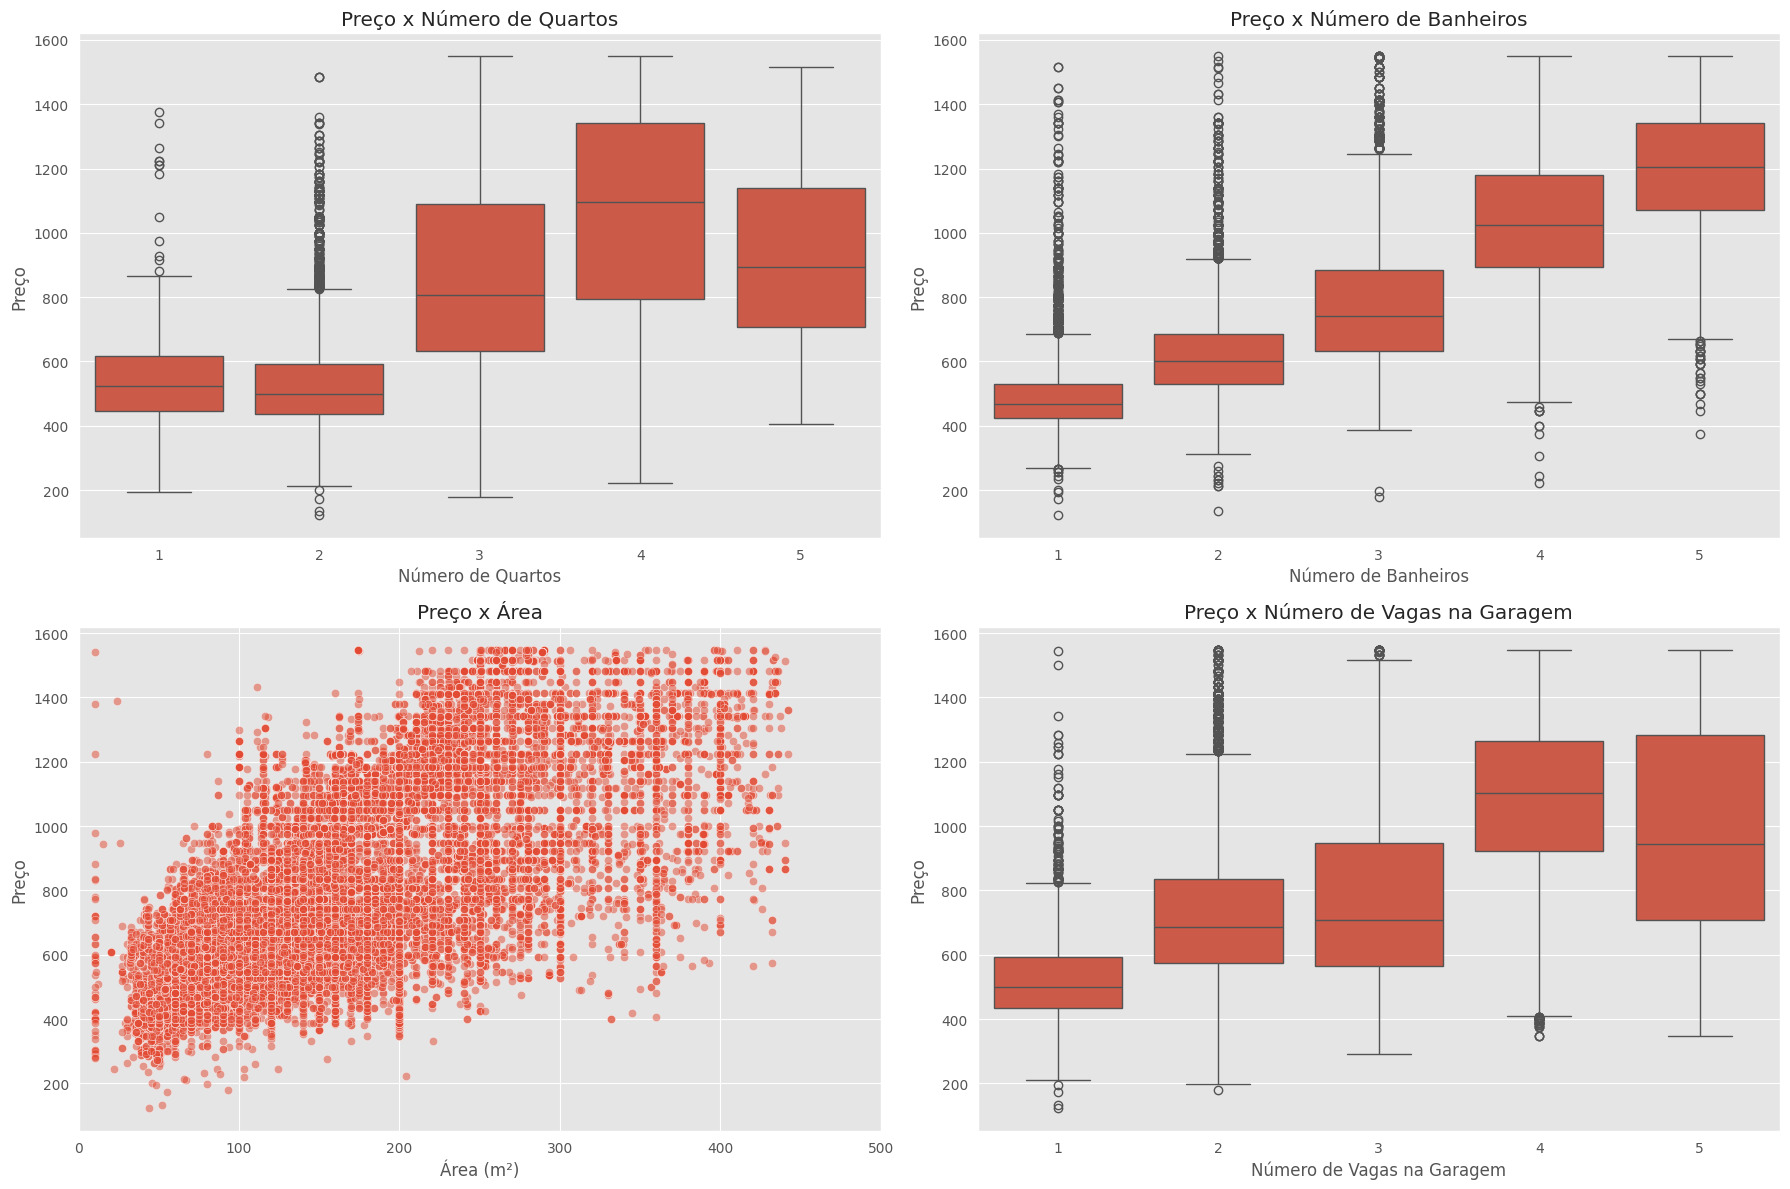

In [30]:
# Relação entre Preço e outras Variáveis

fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Relação entre Preço e Número de Quartos
sns.boxplot(x=df_cleaned['quartos'], y=df_cleaned['preco'], ax=axs[0, 0])
axs[0, 0].set_title('Preço x Número de Quartos')
axs[0, 0].set_ylabel('Preço')
axs[0, 0].set_xlabel('Número de Quartos')

# Relação entre Preço e Número de Banheiros
sns.boxplot(x=df_cleaned['banheiros'], y=df_cleaned['preco'], ax=axs[0, 1])
axs[0, 1].set_title('Preço x Número de Banheiros')
axs[0, 1].set_ylabel('Preço')
axs[0, 1].set_xlabel('Número de Banheiros')

# Relação entre Preço e Área
sns.scatterplot(x=df_cleaned['area'], y=df_cleaned['preco'], ax=axs[1, 0], alpha=0.5)
axs[1, 0].set_title('Preço x Área')
axs[1, 0].set_ylabel('Preço')
axs[1, 0].set_xlabel('Área (m²)')
axs[1, 0].set_xlim(0, 500)  # Limitando a visualização da área para melhor visualização

# Relação entre Preço e Número de Vagas na Garagem
sns.boxplot(x=df_cleaned['garagem'], y=df_cleaned['preco'], ax=axs[1, 1])
axs[1, 1].set_title('Preço x Número de Vagas na Garagem')
axs[1, 1].set_ylabel('Preço')
axs[1, 1].set_xlabel('Número de Vagas na Garagem')

plt.tight_layout()
plt.show()

In [31]:
df['tipo'].value_counts(normalize=True)

tipo
casa          0.61
apartamento   0.39
Name: proportion, dtype: float64

# Preprocess

In [32]:
df_cleaned.columns

Index(['nome', 'preco', 'quartos', 'garagem', 'area', 'banheiros',
       'condominio', 'link', 'tipo', 'bairro', 'latitude', 'longitude',
       'regiao'],
      dtype='object')

In [33]:
df_process = df_cleaned.drop(['latitude','longitude', 'link','nome'], axis=1).copy()

In [34]:
df_process.columns

Index(['preco', 'quartos', 'garagem', 'area', 'banheiros', 'condominio',
       'tipo', 'bairro', 'regiao'],
      dtype='object')

In [35]:
# Definindo as colunas que serão escalonadas
cols_to_scale = ['area', 'condominio']

# Inicializando o escalonador
scaler = StandardScaler()

# Escalonando as colunas
df_process[cols_to_scale] = scaler.fit_transform(df_process[cols_to_scale])

# Verificando as primeiras linhas do df_cleanedset após o escalonamento
df_process[cols_to_scale].head()

# Codificando a variável 'regiao' usando one-hot encoding
df_process = pd.get_dummies(df_process, columns=['regiao'])
df_process = pd.get_dummies(df_process, columns=['tipo'])


# Criando uma codificação de frequência para a coluna 'bairro'
bairro_freq = df_process['bairro'].value_counts(normalize=True)
df_process['bairro'] = df_process['bairro'].map(bairro_freq)



In [36]:
df_process.head()

,preco,quartos,garagem,area,banheiros,condominio,bairro,regiao_BOSQUE,regiao_CEU,regiao_Centro,regiao_Cidade das Crianças,regiao_HB,regiao_Pinheirinho,regiao_Represa,regiao_Schimidt,regiao_Talhados,regiao_Vila Toninho,tipo_apartamento,tipo_casa
0,424.26,2,1,-1.15,1,-0.93,0.05,False,False,True,False,False,False,False,False,False,False,True,False
1,387.30,2,1,-1.08,1,-0.83,0.00,False,False,False,True,False,False,False,False,False,False,True,False
2,374.17,2,1,-1.13,2,-0.83,0.00,False,True,False,False,False,False,False,False,False,False,True,False
3,412.31,2,1,-1.17,1,-0.71,0.02,False,False,False,False,False,False,True,False,False,False,True,False
4,357.77,2,1,-1.03,1,-0.82,0.01,False,False,False,True,False,False,False,False,False,False,True,False


# Machine Learning

In [37]:
X = df_process.drop(['preco'], axis=1)
y = df_process['preco']

In [38]:
X.head()

,quartos,garagem,area,banheiros,condominio,bairro,regiao_BOSQUE,regiao_CEU,regiao_Centro,regiao_Cidade das Crianças,regiao_HB,regiao_Pinheirinho,regiao_Represa,regiao_Schimidt,regiao_Talhados,regiao_Vila Toninho,tipo_apartamento,tipo_casa
0,2,1,-1.15,1,-0.93,0.05,False,False,True,False,False,False,False,False,False,False,True,False
1,2,1,-1.08,1,-0.83,0.00,False,False,False,True,False,False,False,False,False,False,True,False
2,2,1,-1.13,2,-0.83,0.00,False,True,False,False,False,False,False,False,False,False,True,False
3,2,1,-1.17,1,-0.71,0.02,False,False,False,False,False,False,True,False,False,False,True,False
4,2,1,-1.03,1,-0.82,0.01,False,False,False,True,False,False,False,False,False,False,True,False


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
X_train.shape, X_test.shape

((29232, 18), (7309, 18))

In [41]:
from sklearn.ensemble import RandomForestRegressor

# Inicializando o modelo de Floresta Aleatória
random_forest_model = RandomForestRegressor(random_state=42, n_jobs=-1)

random_forest_model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [42]:
y_pred_best = random_forest_model.predict(X_test)

# Calculando métricas de avaliação
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = mean_squared_error(y_test, y_pred_best, squared=False)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

mse_best**2, rmse_best**2, mae_best**2, r2_best

(35901339.2553235, 5991.772630476184, 2428.083137470893, 0.9307938674004149)

## Cross Validation

In [110]:
from sklearn.model_selection import cross_val_score

In [111]:
scores = cross_val_score(random_forest_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

In [112]:
mean_score = (scores**2).mean()
std_score = (scores**2).std()

In [113]:
print(mean_score)
print(std_score)


2900.2468669341274
85.43987702102373


In [190]:
#!pip install optuna

  Using cached optuna-3.3.0-py3-none-any.whl (404 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 13.8 MB/s eta 0:00:0000:0100:01
  Using cached colorlog-6.7.0-py2.py3-none-any.whl (11 kB)
  Using cached tqdm-4.66.1-py3-none-any.whl (78 kB)
  Using cached cmaes-0.10.0-py3-none-any.whl (29 kB)
  Using cached alembic-1.12.0-py3-none-any.whl (226 kB)
  Using cached Mako-1.2.4-py3-none-any.whl (78 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.9/612.9 kB 35.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


# Optune Fine Tunning

In [201]:
import optuna

/home/edilson07/.pyenv/versions/3.10.11/envs/rp_housing/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [226]:
old_params = random_forest_model.get_params()

In [227]:
old_params

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [235]:
def refined_objective(trial):
    # Definindo um espaço de pesquisa centrado nos parâmetros fornecidos
    n_estimators = trial.suggest_int('n_estimators', 100, 150)
    criterion = 'squared_error'  # fixo baseado no que foi fornecido anteriormente
    max_depth = trial.suggest_int('max_depth', 30, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 5)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 3)
    max_features = trial.suggest_float('max_features', 0.7, 0.8)
    bootstrap = True  # fixo baseado no que foi fornecido anteriormente
    ccp_alpha = trial.suggest_float('ccp_alpha', 0.03, 0.05)

    # Criando o modelo com os hiperparâmetros sugeridos
    model = RandomForestRegressor(
        n_estimators=n_estimators, 
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        bootstrap=bootstrap,
        ccp_alpha=ccp_alpha,
        random_state=42  # fixando a semente para reprodutibilidade
    )

# Treinando o modelo
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    return mean_squared_error(y_test, predictions, squared=False)

In [243]:
study = optuna.create_study(direction='minimize')  # Minimize MAE
study.optimize(refined_objective, n_trials=100, show_progress_bar=True)  # n_trials define quantas iterações de otimização você deseja

best_params = study.best_params

[I 2023-10-08 18:27:23,040] A new study created in memory with name: no-name-aa8f5b8f-394f-42a5-873c-645006dee920
Best trial: 0. Best value: 78.8871:   1%|▍                                              | 1/100 [00:10<18:04, 10.95s/it]

[I 2023-10-08 18:27:33,993] Trial 0 finished with value: 78.887125922805 and parameters: {'n_estimators': 108, 'max_depth': 39, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 0.7299845129909278, 'ccp_alpha': 0.049081008909931834}. Best is trial 0 with value: 78.887125922805.


Best trial: 1. Best value: 77.4927:   2%|▉                                              | 2/100 [00:28<24:01, 14.71s/it]

[I 2023-10-08 18:27:51,326] Trial 1 finished with value: 77.49268473842213 and parameters: {'n_estimators': 110, 'max_depth': 32, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 0.7398067601687616, 'ccp_alpha': 0.048744796828241115}. Best is trial 1 with value: 77.49268473842213.


Best trial: 2. Best value: 76.8719:   3%|█▎                                           | 3/100 [01:37<1:04:02, 39.61s/it]

[I 2023-10-08 18:29:00,571] Trial 2 finished with value: 76.87186409827541 and parameters: {'n_estimators': 148, 'max_depth': 35, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.7060651000422167, 'ccp_alpha': 0.04522154819203346}. Best is trial 2 with value: 76.87186409827541.


Best trial: 2. Best value: 76.8719:   4%|█▉                                             | 4/100 [01:43<42:06, 26.32s/it]

[I 2023-10-08 18:29:06,516] Trial 3 finished with value: 80.62539564419231 and parameters: {'n_estimators': 118, 'max_depth': 37, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 0.7566864864881274, 'ccp_alpha': 0.036841795238742564}. Best is trial 2 with value: 76.87186409827541.


Best trial: 2. Best value: 76.8719:   5%|██▎                                            | 5/100 [01:52<31:49, 20.10s/it]

[I 2023-10-08 18:29:15,590] Trial 4 finished with value: 78.8789482263128 and parameters: {'n_estimators': 124, 'max_depth': 38, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 0.7598936476826862, 'ccp_alpha': 0.03455698599521544}. Best is trial 2 with value: 76.87186409827541.


Best trial: 2. Best value: 76.8719:   6%|██▊                                            | 6/100 [02:03<26:40, 17.03s/it]

[I 2023-10-08 18:29:26,650] Trial 5 finished with value: 79.04299060198267 and parameters: {'n_estimators': 106, 'max_depth': 38, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 0.7927950471927092, 'ccp_alpha': 0.04338314078359681}. Best is trial 2 with value: 76.87186409827541.


Best trial: 2. Best value: 76.8719:   7%|███▎                                           | 7/100 [02:09<20:46, 13.40s/it]

[I 2023-10-08 18:29:32,586] Trial 6 finished with value: 80.69135368363614 and parameters: {'n_estimators': 119, 'max_depth': 37, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 0.711587413370399, 'ccp_alpha': 0.0442486320532737}. Best is trial 2 with value: 76.87186409827541.


Best trial: 2. Best value: 76.8719:   8%|███▊                                           | 8/100 [02:20<19:15, 12.56s/it]

[I 2023-10-08 18:29:43,341] Trial 7 finished with value: 78.83664553941941 and parameters: {'n_estimators': 117, 'max_depth': 45, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 0.7516355065567829, 'ccp_alpha': 0.03576947719785682}. Best is trial 2 with value: 76.87186409827541.


Best trial: 2. Best value: 76.8719:   9%|████▏                                          | 9/100 [02:29<17:34, 11.59s/it]

[I 2023-10-08 18:29:52,788] Trial 8 finished with value: 78.8629346244629 and parameters: {'n_estimators': 107, 'max_depth': 41, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 0.7713969693111187, 'ccp_alpha': 0.03059709253314549}. Best is trial 2 with value: 76.87186409827541.


Best trial: 2. Best value: 76.8719:  10%|████▌                                         | 10/100 [03:06<29:03, 19.38s/it]

[I 2023-10-08 18:30:29,610] Trial 9 finished with value: 77.41045164509659 and parameters: {'n_estimators': 138, 'max_depth': 48, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 0.7908689529510707, 'ccp_alpha': 0.03812232029689863}. Best is trial 2 with value: 76.87186409827541.


Best trial: 10. Best value: 76.8063:  11%|████▉                                        | 11/100 [04:15<51:05, 34.45s/it]

[I 2023-10-08 18:31:38,228] Trial 10 finished with value: 76.80629257245558 and parameters: {'n_estimators': 149, 'max_depth': 31, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.7014510882273691, 'ccp_alpha': 0.04195496233719683}. Best is trial 10 with value: 76.80629257245558.


Best trial: 10. Best value: 76.8063:  12%|█████▏                                     | 12/100 [05:23<1:05:30, 44.67s/it]

[I 2023-10-08 18:32:46,274] Trial 11 finished with value: 76.89303198456237 and parameters: {'n_estimators': 150, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.7007799299164187, 'ccp_alpha': 0.04178004502128221}. Best is trial 10 with value: 76.80629257245558.


Best trial: 12. Best value: 76.7521:  13%|█████▌                                     | 13/100 [06:32<1:15:47, 52.27s/it]

[I 2023-10-08 18:33:56,031] Trial 12 finished with value: 76.75209126359243 and parameters: {'n_estimators': 150, 'max_depth': 33, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.7174848303286274, 'ccp_alpha': 0.04521864127200897}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  14%|██████                                     | 14/100 [07:36<1:19:54, 55.75s/it]

[I 2023-10-08 18:34:59,812] Trial 13 finished with value: 77.0446142094711 and parameters: {'n_estimators': 137, 'max_depth': 33, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.722261024775545, 'ccp_alpha': 0.04057711669124282}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  15%|██████▍                                    | 15/100 [08:13<1:10:51, 50.02s/it]

[I 2023-10-08 18:35:36,552] Trial 14 finished with value: 77.008767427435 and parameters: {'n_estimators': 140, 'max_depth': 30, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 0.720375438176562, 'ccp_alpha': 0.04615452597454926}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  16%|██████▉                                    | 16/100 [09:18<1:16:21, 54.54s/it]

[I 2023-10-08 18:36:41,586] Trial 15 finished with value: 76.8161495137456 and parameters: {'n_estimators': 143, 'max_depth': 34, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.7147276403942802, 'ccp_alpha': 0.041518065231290834}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  17%|███████▎                                   | 17/100 [09:39<1:01:16, 44.30s/it]

[I 2023-10-08 18:37:02,082] Trial 16 finished with value: 77.42049270668304 and parameters: {'n_estimators': 131, 'max_depth': 43, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 0.7002598950779654, 'ccp_alpha': 0.04628693471383252}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  18%|████████                                     | 18/100 [09:45<45:08, 33.03s/it]

[I 2023-10-08 18:37:08,858] Trial 17 finished with value: 80.65215189683222 and parameters: {'n_estimators': 133, 'max_depth': 32, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 0.7307170129407135, 'ccp_alpha': 0.03925799503714684}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  19%|████████▌                                    | 19/100 [10:54<59:00, 43.71s/it]

[I 2023-10-08 18:38:17,455] Trial 18 finished with value: 76.86733021187922 and parameters: {'n_estimators': 146, 'max_depth': 35, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.7113911266819243, 'ccp_alpha': 0.04317190142440546}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  20%|█████████                                    | 20/100 [11:07<46:02, 34.54s/it]

[I 2023-10-08 18:38:30,617] Trial 19 finished with value: 78.87113875412899 and parameters: {'n_estimators': 130, 'max_depth': 50, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 0.7421159500271282, 'ccp_alpha': 0.04727127323889806}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  21%|█████████▍                                   | 21/100 [11:53<50:09, 38.10s/it]

[I 2023-10-08 18:39:17,024] Trial 20 finished with value: 76.87974736589901 and parameters: {'n_estimators': 101, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.7220492678291072, 'ccp_alpha': 0.04393216783299732}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  22%|█████████▉                                   | 22/100 [12:58<59:56, 46.11s/it]

[I 2023-10-08 18:40:21,809] Trial 21 finished with value: 76.81601850588528 and parameters: {'n_estimators': 143, 'max_depth': 34, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.7129441418459714, 'ccp_alpha': 0.04153616859078108}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  23%|█████████▉                                 | 23/100 [14:04<1:06:49, 52.07s/it]

[I 2023-10-08 18:41:27,768] Trial 22 finished with value: 76.85288063781229 and parameters: {'n_estimators': 144, 'max_depth': 35, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.7083068607186824, 'ccp_alpha': 0.04189758862850957}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  24%|██████████▎                                | 24/100 [15:11<1:11:31, 56.46s/it]

[I 2023-10-08 18:42:34,485] Trial 23 finished with value: 76.75548791496706 and parameters: {'n_estimators': 150, 'max_depth': 33, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.7013127285128615, 'ccp_alpha': 0.03945949521282739}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  25%|██████████▊                                | 25/100 [15:48<1:03:15, 50.60s/it]

[I 2023-10-08 18:43:11,416] Trial 24 finished with value: 77.00633096159511 and parameters: {'n_estimators': 150, 'max_depth': 32, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 0.7020915402830203, 'ccp_alpha': 0.03945396494736063}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  26%|███████████▋                                 | 26/100 [16:01<48:36, 39.42s/it]

[I 2023-10-08 18:43:24,745] Trial 25 finished with value: 78.57152619784156 and parameters: {'n_estimators': 146, 'max_depth': 31, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 0.7071344616509347, 'ccp_alpha': 0.039986860668669674}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  27%|████████████▏                                | 27/100 [16:36<46:15, 38.02s/it]

[I 2023-10-08 18:43:59,512] Trial 26 finished with value: 76.75611582128597 and parameters: {'n_estimators': 135, 'max_depth': 36, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 0.7178257540725331, 'ccp_alpha': 0.04511961100495555}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  28%|████████████▌                                | 28/100 [16:57<39:35, 33.00s/it]

[I 2023-10-08 18:44:20,777] Trial 27 finished with value: 77.38737731298129 and parameters: {'n_estimators': 135, 'max_depth': 40, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 0.7172023604299511, 'ccp_alpha': 0.0499842012815637}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  29%|█████████████                                | 29/100 [17:10<31:50, 26.91s/it]

[I 2023-10-08 18:44:33,477] Trial 28 finished with value: 78.80650071264633 and parameters: {'n_estimators': 125, 'max_depth': 36, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 0.7277854805296152, 'ccp_alpha': 0.04726989110195572}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  30%|█████████████▌                               | 30/100 [17:24<26:44, 22.92s/it]

[I 2023-10-08 18:44:47,107] Trial 29 finished with value: 78.82623577870744 and parameters: {'n_estimators': 138, 'max_depth': 40, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 0.7310373528034393, 'ccp_alpha': 0.04491007855394825}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  31%|█████████████▉                               | 31/100 [17:44<25:29, 22.17s/it]

[I 2023-10-08 18:45:07,529] Trial 30 finished with value: 77.15259836116834 and parameters: {'n_estimators': 141, 'max_depth': 33, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 0.7178542271778956, 'ccp_alpha': 0.04331997215334086}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  32%|██████████████▍                              | 32/100 [18:53<40:57, 36.15s/it]

[I 2023-10-08 18:46:16,280] Trial 31 finished with value: 76.75486941132951 and parameters: {'n_estimators': 150, 'max_depth': 33, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.7062844787836643, 'ccp_alpha': 0.04228972053814184}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  33%|██████████████▊                              | 33/100 [20:02<51:31, 46.14s/it]

[I 2023-10-08 18:47:25,732] Trial 32 finished with value: 76.78959619081056 and parameters: {'n_estimators': 146, 'max_depth': 33, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.7079113472498544, 'ccp_alpha': 0.04831288788990846}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  34%|███████████████▎                             | 34/100 [20:36<46:45, 42.50s/it]

[I 2023-10-08 18:47:59,745] Trial 33 finished with value: 76.9217130379961 and parameters: {'n_estimators': 128, 'max_depth': 36, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 0.725416958924333, 'ccp_alpha': 0.045133540281962925}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  35%|███████████████▋                             | 35/100 [21:45<54:25, 50.24s/it]

[I 2023-10-08 18:49:08,047] Trial 34 finished with value: 76.7845883478045 and parameters: {'n_estimators': 147, 'max_depth': 34, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.7134498855569498, 'ccp_alpha': 0.045965942583594446}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  36%|████████████████▏                            | 36/100 [22:49<58:09, 54.53s/it]

[I 2023-10-08 18:50:12,579] Trial 35 finished with value: 76.88898308951624 and parameters: {'n_estimators': 141, 'max_depth': 36, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.705890748415653, 'ccp_alpha': 0.04269154840604849}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  37%|████████████████▋                            | 37/100 [23:29<52:39, 50.15s/it]

[I 2023-10-08 18:50:52,523] Trial 36 finished with value: 76.94493851880448 and parameters: {'n_estimators': 150, 'max_depth': 38, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 0.7378776183466572, 'ccp_alpha': 0.044076176819140035}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  38%|█████████████████                            | 38/100 [23:39<39:23, 38.12s/it]

[I 2023-10-08 18:51:02,557] Trial 37 finished with value: 78.61689325035339 and parameters: {'n_estimators': 144, 'max_depth': 32, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 0.7177975525717698, 'ccp_alpha': 0.04280386044223972}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  39%|█████████████████▌                           | 39/100 [23:45<28:58, 28.49s/it]

[I 2023-10-08 18:51:08,593] Trial 38 finished with value: 80.6482327599656 and parameters: {'n_estimators': 122, 'max_depth': 34, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 0.7063203733169078, 'ccp_alpha': 0.04459351003491905}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  40%|██████████████████                           | 40/100 [24:15<28:47, 28.79s/it]

[I 2023-10-08 18:51:38,085] Trial 39 finished with value: 76.9258250367877 and parameters: {'n_estimators': 113, 'max_depth': 38, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 0.7246569555416332, 'ccp_alpha': 0.040634757476910054}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  41%|██████████████████▍                          | 41/100 [25:14<37:26, 38.08s/it]

[I 2023-10-08 18:52:37,839] Trial 40 finished with value: 76.95201317108895 and parameters: {'n_estimators': 135, 'max_depth': 42, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.7124503282913872, 'ccp_alpha': 0.038651865977578866}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  42%|██████████████████▉                          | 42/100 [26:22<45:25, 46.99s/it]

[I 2023-10-08 18:53:45,619] Trial 41 finished with value: 76.78447747833314 and parameters: {'n_estimators': 147, 'max_depth': 34, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.7139289011275589, 'ccp_alpha': 0.045921677595489895}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  43%|███████████████████▎                         | 43/100 [27:29<50:17, 52.94s/it]

[I 2023-10-08 18:54:52,436] Trial 42 finished with value: 76.83077624360874 and parameters: {'n_estimators': 146, 'max_depth': 31, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.7171131972588475, 'ccp_alpha': 0.045898254776786884}. Best is trial 12 with value: 76.75209126359243.


Best trial: 12. Best value: 76.7521:  44%|███████████████████▊                         | 44/100 [28:36<53:22, 57.18s/it]

[I 2023-10-08 18:55:59,526] Trial 43 finished with value: 76.82087460826544 and parameters: {'n_estimators': 148, 'max_depth': 37, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.70933755638427, 'ccp_alpha': 0.04394908408815182}. Best is trial 12 with value: 76.75209126359243.


Best trial: 44. Best value: 76.7517:  45%|████████████████████▎                        | 45/100 [29:44<55:29, 60.54s/it]

[I 2023-10-08 18:57:07,887] Trial 44 finished with value: 76.75173795312904 and parameters: {'n_estimators': 150, 'max_depth': 33, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.7036269460085399, 'ccp_alpha': 0.0450613565153746}. Best is trial 44 with value: 76.75173795312904.


Best trial: 45. Best value: 76.7507:  46%|████████████████████▋                        | 46/100 [30:53<56:44, 63.05s/it]

[I 2023-10-08 18:58:16,803] Trial 45 finished with value: 76.7506679172106 and parameters: {'n_estimators': 150, 'max_depth': 33, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.7029116072279078, 'ccp_alpha': 0.044851722170112455}. Best is trial 45 with value: 76.7506679172106.


Best trial: 45. Best value: 76.7507:  47%|█████████████████████▏                       | 47/100 [32:01<56:54, 64.43s/it]

[I 2023-10-08 18:59:24,454] Trial 46 finished with value: 76.7551445495486 and parameters: {'n_estimators': 150, 'max_depth': 33, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.7047608661441445, 'ccp_alpha': 0.042505390691936755}. Best is trial 45 with value: 76.7506679172106.


Best trial: 45. Best value: 76.7507:  48%|█████████████████████▌                       | 48/100 [32:14<42:26, 48.97s/it]

[I 2023-10-08 18:59:37,360] Trial 47 finished with value: 78.5994898727663 and parameters: {'n_estimators': 144, 'max_depth': 32, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 0.7047613757821737, 'ccp_alpha': 0.04240275297627642}. Best is trial 45 with value: 76.7506679172106.


Best trial: 45. Best value: 76.7507:  49%|██████████████████████                       | 49/100 [33:21<46:16, 54.45s/it]

[I 2023-10-08 19:00:44,575] Trial 48 finished with value: 76.9540740105206 and parameters: {'n_estimators': 148, 'max_depth': 46, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.704704068243475, 'ccp_alpha': 0.043826133296682515}. Best is trial 45 with value: 76.7506679172106.


Best trial: 45. Best value: 76.7507:  50%|██████████████████████▌                      | 50/100 [34:25<47:40, 57.22s/it]

[I 2023-10-08 19:01:48,265] Trial 49 finished with value: 76.84456091097154 and parameters: {'n_estimators': 140, 'max_depth': 35, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.7105749141974019, 'ccp_alpha': 0.04453072921272362}. Best is trial 45 with value: 76.7506679172106.


Best trial: 45. Best value: 76.7507:  51%|██████████████████████▉                      | 51/100 [35:29<48:22, 59.24s/it]

[I 2023-10-08 19:02:52,223] Trial 50 finished with value: 76.81237632262153 and parameters: {'n_estimators': 142, 'max_depth': 31, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.7002713173205752, 'ccp_alpha': 0.04312368366247652}. Best is trial 45 with value: 76.7506679172106.


Best trial: 45. Best value: 76.7507:  52%|███████████████████████▍                     | 52/100 [36:35<49:09, 61.45s/it]

[I 2023-10-08 19:03:58,816] Trial 51 finished with value: 76.7547543685008 and parameters: {'n_estimators': 150, 'max_depth': 33, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.7024791618806114, 'ccp_alpha': 0.04072661971981785}. Best is trial 45 with value: 76.7506679172106.


Best trial: 45. Best value: 76.7507:  53%|███████████████████████▊                     | 53/100 [37:45<50:07, 63.99s/it]

[I 2023-10-08 19:05:08,752] Trial 52 finished with value: 76.75444222704374 and parameters: {'n_estimators': 150, 'max_depth': 33, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.70437274878369, 'ccp_alpha': 0.0427936660297938}. Best is trial 45 with value: 76.7506679172106.


Best trial: 45. Best value: 76.7507:  54%|████████████████████████▎                    | 54/100 [38:52<49:42, 64.84s/it]

[I 2023-10-08 19:06:15,568] Trial 53 finished with value: 76.8947749523595 and parameters: {'n_estimators': 148, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.7091815504167731, 'ccp_alpha': 0.041140010438829776}. Best is trial 45 with value: 76.7506679172106.


Best trial: 45. Best value: 76.7507:  55%|████████████████████████▊                    | 55/100 [39:57<48:35, 64.80s/it]

[I 2023-10-08 19:07:20,258] Trial 54 finished with value: 76.79532985985817 and parameters: {'n_estimators': 145, 'max_depth': 33, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.7036856375083264, 'ccp_alpha': 0.04098573837488478}. Best is trial 45 with value: 76.7506679172106.


Best trial: 45. Best value: 76.7507:  56%|█████████████████████████▏                   | 56/100 [41:03<47:50, 65.23s/it]

[I 2023-10-08 19:08:26,515] Trial 55 finished with value: 76.82502912080713 and parameters: {'n_estimators': 148, 'max_depth': 31, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.7001866207765827, 'ccp_alpha': 0.041762464637172786}. Best is trial 45 with value: 76.7506679172106.


Best trial: 45. Best value: 76.7507:  57%|█████████████████████████▋                   | 57/100 [42:11<47:18, 66.01s/it]

[I 2023-10-08 19:09:34,340] Trial 56 finished with value: 76.85384192946852 and parameters: {'n_estimators': 150, 'max_depth': 32, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.7107076145281884, 'ccp_alpha': 0.04326906729936149}. Best is trial 45 with value: 76.7506679172106.


Best trial: 45. Best value: 76.7507:  58%|██████████████████████████                   | 58/100 [43:16<46:03, 65.79s/it]

[I 2023-10-08 19:10:39,621] Trial 57 finished with value: 76.84882188388175 and parameters: {'n_estimators': 145, 'max_depth': 35, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.7051340268189272, 'ccp_alpha': 0.042224383733322664}. Best is trial 45 with value: 76.7506679172106.


Best trial: 45. Best value: 76.7507:  59%|██████████████████████████▌                  | 59/100 [43:29<34:04, 49.86s/it]

[I 2023-10-08 19:10:52,323] Trial 58 finished with value: 78.54415087351977 and parameters: {'n_estimators': 139, 'max_depth': 37, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 0.7090434881186494, 'ccp_alpha': 0.04533482186374434}. Best is trial 45 with value: 76.7506679172106.


Best trial: 45. Best value: 76.7507:  60%|███████████████████████████                  | 60/100 [43:49<27:13, 40.85s/it]

[I 2023-10-08 19:11:12,134] Trial 59 finished with value: 77.19577864182946 and parameters: {'n_estimators': 142, 'max_depth': 34, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 0.7151681375533677, 'ccp_alpha': 0.04020130636579968}. Best is trial 45 with value: 76.7506679172106.


Best trial: 45. Best value: 76.7507:  61%|███████████████████████████▍                 | 61/100 [43:56<20:06, 30.94s/it]

[I 2023-10-08 19:11:19,953] Trial 60 finished with value: 80.57516831163957 and parameters: {'n_estimators': 148, 'max_depth': 32, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 0.7030347186235153, 'ccp_alpha': 0.043764896741698533}. Best is trial 45 with value: 76.7506679172106.


Best trial: 45. Best value: 76.7507:  62%|███████████████████████████▉                 | 62/100 [45:04<26:30, 41.86s/it]

[I 2023-10-08 19:12:27,276] Trial 61 finished with value: 76.75488792161016 and parameters: {'n_estimators': 150, 'max_depth': 33, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.704777664596976, 'ccp_alpha': 0.0424469675094423}. Best is trial 45 with value: 76.7506679172106.


Best trial: 45. Best value: 76.7507:  63%|████████████████████████████▎                | 63/100 [46:13<30:49, 49.99s/it]

[I 2023-10-08 19:13:36,248] Trial 62 finished with value: 76.75486735903523 and parameters: {'n_estimators': 150, 'max_depth': 33, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.7030613400338169, 'ccp_alpha': 0.0416961704891347}. Best is trial 45 with value: 76.7506679172106.


Best trial: 45. Best value: 76.7507:  64%|████████████████████████████▊                | 64/100 [47:21<33:19, 55.54s/it]

[I 2023-10-08 19:14:44,728] Trial 63 finished with value: 76.78484607204602 and parameters: {'n_estimators': 147, 'max_depth': 34, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.7008160889269428, 'ccp_alpha': 0.04449990760708893}. Best is trial 45 with value: 76.7506679172106.


Best trial: 45. Best value: 76.7507:  64%|████████████████████████████▊                | 64/100 [47:23<26:39, 44.42s/it]


[W 2023-10-08 19:14:46,162] Trial 64 failed with parameters: {'n_estimators': 145, 'max_depth': 32, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.707361867355648, 'ccp_alpha': 0.04167384537883271} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/home/edilson07/.pyenv/versions/3.10.11/envs/rp_housing/lib/python3.10/site-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "/tmp/ipykernel_12183/1386968786.py", line 26, in refined_objective
    model.fit(X_train, y_train)
  File "/home/edilson07/.pyenv/versions/3.10.11/envs/rp_housing/lib/python3.10/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/edilson07/.pyenv/versions/3.10.11/envs/rp_housing/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 456, in fit
    trees = Parallel(
  File "/home/edilson07/.pyenv/versions/3.10.11/envs/rp_housing/l

KeyboardInterrupt: 

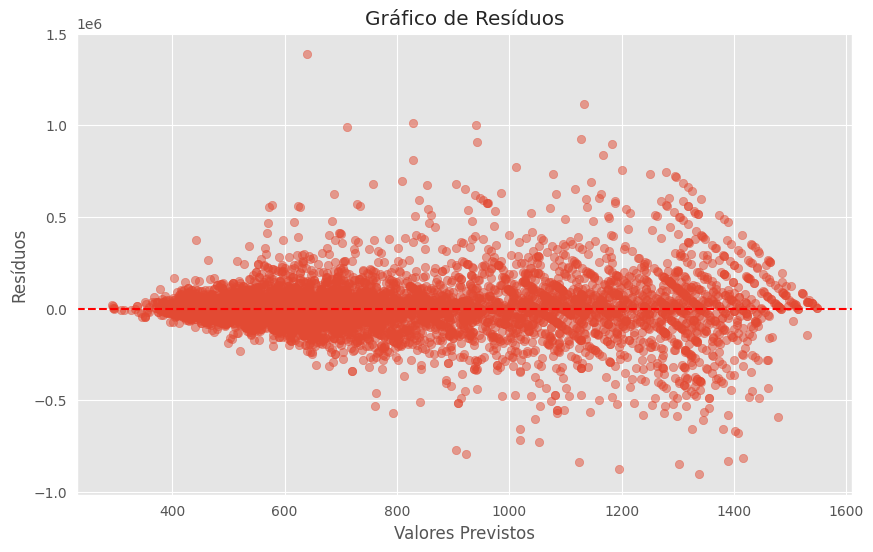

In [116]:
import matplotlib.pyplot as plt

# Usando o modelo para fazer previsões no conjunto de validação
predicted_values = random_forest_model.predict(X_test)

# Calculando os resíduos
residuals = y_test**2 - predicted_values**2

# Plotando o gráfico de resíduos
plt.figure(figsize=(10, 6))
plt.scatter(predicted_values, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')  # Linha horizontal
plt.title("Gráfico de Resíduos")
plt.xlabel("Valores Previstos")
plt.ylabel("Resíduos")
plt.show()

In [118]:
index_max_residual = np.argmax(np.abs(residuals))

row_X_test_max_residual = df.iloc[index_max_residual]

row_X_test_max_residual

nome             Apartamento Cobertura em São José do Rio Preto
preco                                                 280000.00
quartos                                                       2
garagem                                                       2
area                                                         96
banheiros                                                     2
condominio                                               500.00
link          https://sp.olx.com.br/regiao-de-sao-jose-do-ri...
tipo                                                apartamento
bairro                               Fazenda Velha (Zona Rural)
latitude                                                 -20.79
longitude                                                -49.38
regiao                                                   Centro
Name: 6944, dtype: object

# FInal Model

In [ ]:
# import joblib

# rf_complete = joblib.load('/home/edilson07/projects/rf_model.joblib')

In [114]:
best_params = {
'n_estimators': 150, 
'max_depth': 33, 
'min_samples_split': 2, 
'min_samples_leaf': 1, 
'max_features': 0.7036269460085399, 
'ccp_alpha': 0.0450613565153746,
'criterion' : 'squared_error',
'bootstrap' : True,
'random_state':42,
'n_jobs':-1}

best_model = RandomForestRegressor(**best_params)

best_model.fit(X_train, y_train)

y_best = best_model.predict(X_test)

In [115]:
# Calculando métricas de avaliação
mse_best = mean_squared_error(y_test, y_best)
rmse_best = mean_squared_error(y_test, y_best, squared=False)
mae_best = mean_absolute_error(y_test, y_best)
r2_best = r2_score(y_test, y_best)

mse_best**2, rmse_best**2, mae_best**2, r2_best

(30778910.751047377, 5547.874435407436, 2440.8010958813697, 0.9359209773966103)

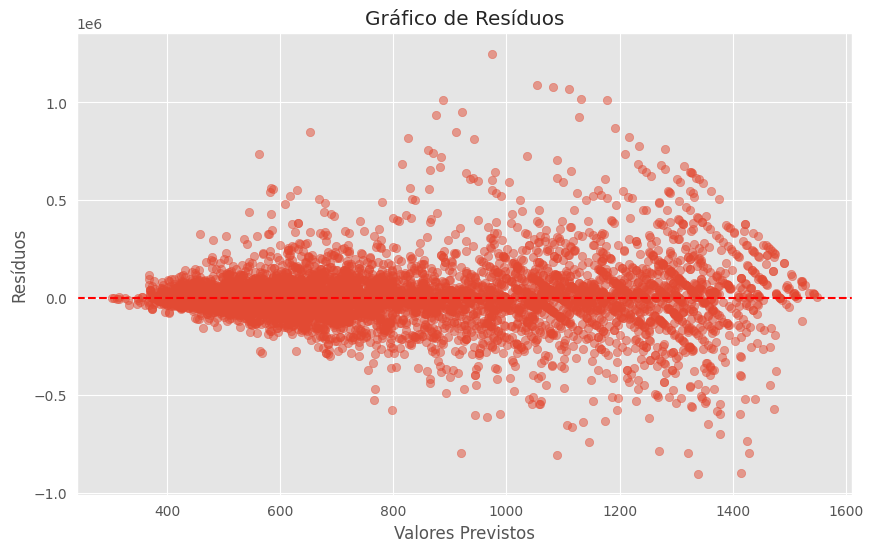

In [73]:
import matplotlib.pyplot as plt

# Usando o modelo para fazer previsões no conjunto de validação
predicted_values = best_model.predict(X_test)

# Calculando os resíduos
residuals = y_test**2 - predicted_values**2

# Plotando o gráfico de resíduos
plt.figure(figsize=(10, 6))
plt.scatter(predicted_values, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')  # Linha horizontal
plt.title("Gráfico de Resíduos")
plt.xlabel("Valores Previstos")
plt.ylabel("Resíduos")
plt.show()

In [75]:
index_max_residual = np.argmax(np.abs(residuals))

row_X_test_max_residual = X_test.iloc[index_max_residual]

row_X_test_max_residual

quartos                           3
garagem                           2
area                           1.49
banheiros                         5
condominio                    -2.21
bairro                         0.00
regiao_BOSQUE                 False
regiao_CEU                    False
regiao_Centro                  True
regiao_Cidade das Crianças    False
regiao_HB                     False
regiao_Pinheirinho            False
regiao_Represa                False
regiao_Schimidt               False
regiao_Talhados               False
regiao_Vila Toninho           False
tipo_apartamento              False
tipo_casa                      True
Name: 16805, dtype: object

# Saving Model

In [252]:
rf_complete = RandomForestRegressor(**best_params)

rf_complete.fit(X, y)

RandomForestRegressor(ccp_alpha=0.0450613565153746, max_depth=33,
                      max_features=0.7036269460085399, n_estimators=150,
                      n_jobs=-1, random_state=42)

In [251]:
best_model.fit(X_train, y_train)

RandomForestRegressor(ccp_alpha=0.0450613565153746, max_depth=33,
                      max_features=0.7036269460085399, n_estimators=150,
                      n_jobs=-1, random_state=42)

In [253]:
# import joblib

# joblib.dump(rf_complete,'rf_model.joblib')

['rf_model.joblib']

# Test Predict

In [155]:
X_test = pd.read_csv('/home/edilson07/projects/rp_housing/datasets/X_test.csv')

In [156]:
import pandas as pd
import inflection
import requests
import numpy as np

X_test.columns = X_test.columns.map(lambda x: inflection.parameterize(x, separator='_'))

X_test['garagem'] = X_test['garagem'].fillna(0)
X_test = X_test.drop(['iptu'], axis=1)

X_test['cidade'] = X_test['localizacao'].str.split(',').str[0]
X_test = X_test.loc[X_test['cidade'] == 'São José do Rio Preto',:] 
X_test['bairro'] = X_test['localizacao'].str.split(',').str[1]


In [157]:
mapping = {'São José do Rio Preto, Centro': (-20.8118189, -49.3801685), 'São José do Rio Preto, Jardim Santa Lúcia': (-20.7991669, -49.4040384), 'São José do Rio Preto, Residencial Ana Célia': (-20.7790137, -49.3976885), 'São José do Rio Preto, Centenário da Emancipação': (-20.7633142, -49.381182), 'São José do Rio Preto, Jardim Yolanda': (-20.8036186, -49.3488176), 'São José do Rio Preto, Eldorado': (-20.7905994, -49.4035921), 'São José do Rio Preto, Jardim Conceição': (-20.7882717, -49.378643), 'São José do Rio Preto, Rios de Spagna': (40.46366700000001, -3.74922), 'São José do Rio Preto, Higienópolis': (-20.8388273, -49.3864829), 'São José do Rio Preto, Jardins Rio Preto': (-20.8127115, -49.376521), 'São José do Rio Preto, Rios di Itália': (-20.7976251, -49.3342278), 'São José do Rio Preto, Jardim Nunes': (-20.7502911, -49.3856754), 'São José do Rio Preto, Residencial Anna Angélica': (-20.7928526, -49.4205513), 'São José do Rio Preto, Jardim Manoel Del Arco': (-20.7694395, -49.3919742), 'São José do Rio Preto, Jardim Vista Alegre': (-20.8068174, -49.3462837), 'São José do Rio Preto, Residencial Macedo Teles I': (-20.8018477, -49.41991609999999), 'São José do Rio Preto, Vila Cristina': (-20.8136423, -49.3646803), 'São José do Rio Preto, Parque Residencial Lauriano Tebar': (-20.8013346, -49.4116591), 'São José do Rio Preto, Loteamento Clube V': (-20.8126993, -49.37653719999999), 'São José do Rio Preto, Vila Anchieta': (-20.7918525, -49.37277220000001), 'São José do Rio Preto, Vila Santa Cândida': (-20.8303174, -49.3995934), 'São José do Rio Preto, Vila São Judas Tadeu': (-20.8255565, -49.3507209), 'São José do Rio Preto, Residencial Rio das Flores': (-20.8062519, -49.429432), 'São José do Rio Preto, Conjunto Habitacional CAIC': (-20.8269488, -49.3526271), 'São José do Rio Preto, Jardim Santa Maria': (-20.8323735, -49.3639592), 'São José do Rio Preto, Jardim Santa Luzia': (-20.8248847, -49.3702642), 'São José do Rio Preto, Vila Toninho': (-20.8467692, -49.3406253), 'São José do Rio Preto, Jardim Seyon': (-20.7787673, -49.3710265), 'São José do Rio Preto, Estância São João': (-20.7714309, -49.3710265), 'São José do Rio Preto, Vila Angélica': (-20.8017926, -49.3767388), 'São José do Rio Preto, Parque São Miguel': (-20.7980052, -49.34628), 'São José do Rio Preto, Jardim Santa Rosa I': (-20.7849527, -49.3686152), 'São José do Rio Preto, Cidade Nova': (-20.8353299, -49.3849908), 'São José do Rio Preto, Jardim Simões': (-20.768033, -49.3812743), 'São José do Rio Preto, Jardim Planalto': (-20.764828, -49.384356), 'São José do Rio Preto, Jardim Residencial Vetorasso': (-20.7979996, -49.4146089), 'São José do Rio Preto, Parque das Flores II': (-20.773943, -49.3736907), 'São José do Rio Preto, Residencial Jardim Antonieta': (-20.7981183, -49.4326214), 'São José do Rio Preto, Jardim Itapema': (-20.7808834, -49.39319769999999), 'São José do Rio Preto, Fazenda Velha (Zona Rural)': (-20.7880673, -49.3803691), 'São José do Rio Preto, Vila Imperial': (-20.8158936, -49.3897237), 'São José do Rio Preto, Jardim Redentor': (-20.8298694, -49.3894347), 'São José do Rio Preto, Boa Vista': (-20.8056337, -49.3840492), 'São José do Rio Preto, Jardim Marajó': (-20.7962466, -49.32725139999999), 'São José do Rio Preto, Parque Industrial': (-20.8020471, -49.3942809), 'São José do Rio Preto, Vila Nossa Senhora do Bonfim': (-20.837825, -49.3722959), 'São José do Rio Preto, Jardim América': (-20.7977467, -49.3646803), 'São José do Rio Preto, Vila Elmaz': (-20.7685547, -49.3716612), 'São José do Rio Preto, Residencial Colorado': (-20.7698374, -49.4154881), 'São José do Rio Preto, Jardim Paulista': (-20.802138, -49.3672187), 'São José do Rio Preto, Bosque da Felicidade': (-20.7771693, -49.3589692), 'São José do Rio Preto, Vila Redentora': (-20.8209302, -49.3871034), 'São José do Rio Preto, Jardim Santa Rosa II': (-20.7852721, -49.36845899999999), 'São José do Rio Preto, Parque Residencial Lauriano Tebar II': (-20.8319529, -49.3485004), 'São José do Rio Preto, Jardim Congonhas': (-20.8072986, -49.4046734), 'São José do Rio Preto, Vila Maceno': (-20.8044909, -49.37241179999999), 'São José do Rio Preto, Parque Estoril': (-20.8351579, -49.3819142), 'São José do Rio Preto, Residencial Santa Filomena': (-20.7837764, -49.3508141), 'São José do Rio Preto, Jardim Nazareth': (-20.7820235, -49.3632632), 'São José do Rio Preto, Vila São Jorge': (-20.7631937, -49.3399364), 'São José do Rio Preto, Vila Borguese': (-20.787598, -49.4192809), 'São José do Rio Preto, Jardim Jandira': (-20.7989437, -49.3485004), 'São José do Rio Preto, Vila Tonello': (-20.8006337, -49.397371), 'São José do Rio Preto, Jardim Caparroz': (-20.7839501, -49.3741999), 'São José do Rio Preto, Vila Itália': (-20.8075905, -49.4078486), 'São José do Rio Preto, Setvalley': (-20.7500378, -49.3317776), 'São José do Rio Preto, Pinheiros': (-20.827017, -49.4019577), 'São José do Rio Preto, Vila Hipódromo': (-20.8189447, -49.3532587), 'São José do Rio Preto, Parque Quinta das Paineiras': (-20.8325998, -49.36592049999999), 'São José do Rio Preto, Jardim Urano': (-20.8328648, -49.3741999), 'São José do Rio Preto, Parque Residencial Nature I': (-20.7637951, -49.419793), 'São José do Rio Preto, Jardim Mugnaini': (-20.7841853, -49.3900695), 'São José do Rio Preto, Vila Moreira': (-20.7989309, -49.388165), 'São José do Rio Preto, Jardim Walkíria': (-20.8303001, -49.3887998), 'São José do Rio Preto, Jardim Ouro Verde': (-20.8356042, -49.3773735), 'São José do Rio Preto, Vila São Manoel': (-20.830051, -49.4009332), 'São José do Rio Preto, Vila Nossa Senhora da Paz': (-20.811746, -49.3945138), 'São José do Rio Preto, Conjunto Habitacional São Deocleciano': (-20.7909238, -49.344592), 'São José do Rio Preto, Estância Parque Azul (Zona Rural)': (-20.8774769, -49.366009), 'São José do Rio Preto, Setparque Avenida 2': (-20.7567789, -49.39260909999999), 'São José do Rio Preto, Parque Residencial Comendador Mançor Daud': (-20.8250626, -49.360461), 'São José do Rio Preto, Vila Ercília': (-20.8142982, -49.3700807), 'São José do Rio Preto, Setparque Horizonte': (-20.7490561, -49.4097729), 'São José do Rio Preto, Vila Boa Esperança': (-20.7910093, -49.3818168), 'São José do Rio Preto, Mariza Cristina II': (-20.7701733, -49.3719785), 'São José do Rio Preto, Parque Residencial Universo': (-20.7880992, -49.4167402), 'São José do Rio Preto, Jardim Bela Vista': (-20.7989489, -49.36122169999999), 'São José do Rio Preto, Jardim Panorama': (-20.831041, -49.4021333), 'São José do Rio Preto, Jardim Maracanã': (-20.8283179, -49.4097538), 'São José do Rio Preto, Jardim Vale do Sol': (-20.7839635, -49.3849908), 'São José do Rio Preto, Vila Diniz': (-20.820531, -49.3683798), 'São José do Rio Preto, Residencial Gaivota I': (-20.811658, -49.34057079999999), 'São José do Rio Preto, Jardim Estrela': (-20.8121265, -49.36150740000001), 'São José do Rio Preto, Jardim Novo Aeroporto': (-20.8144994, -49.4084837), 'São José do Rio Preto, São Francisco': (-20.8439424, -49.3799316), 'São José do Rio Preto, Jardim Primavera': (-20.7992453, -49.3570657), 'São José do Rio Preto, Parque Residencial Joaquim Nabuco': (-20.789272, -49.3735653), 'São José do Rio Preto, Vila Sinibaldi': (-20.8254373, -49.3768536), 'São José do Rio Preto, Parque Residencial Dom Lafayete Libanio': (-20.7742974, -49.3905508), 'São José do Rio Preto, Jardim Suzana': (-20.7810737, -49.3748346), 'São José do Rio Preto, Vila São José': (-20.8260421, -49.3948985), 'São José do Rio Preto, Conjunto Habitacional Cristo Rei': (-20.8358683, -49.3499874), 'São José do Rio Preto, Recanto Dos Eduardos': (-20.7922025, -49.3377164), 'São José do Rio Preto, Jardim Bordon': (-20.796593, -49.3627765), 'São José do Rio Preto, Bom Jardim': (-20.8302131, -49.3799125), 'São José do Rio Preto, Jardim do Lago': (-20.7722936, -49.3543209), 'São José do Rio Preto, Residencial Cidade Jardim': (-20.8435968, -49.3664207), 'São José do Rio Preto, Jardim Gisette': (-20.7871668, -49.41991609999999), 'São José do Rio Preto, Jardim Paulistano': (-20.802138, -49.3672187), 'São José do Rio Preto, Jardim do Bosque': (-20.7786144, -49.36404570000001), 'São José do Rio Preto, Jardim Canaã': (-20.8034066, -49.3995934), 'São José do Rio Preto, Vila Clementina': (-20.7741678, -49.3741999), 'São José do Rio Preto, Loteamento Porto Seguro': (-20.7999717, -49.41546990000001), 'São José do Rio Preto, Jardim Herculano': (-20.8096061, -49.4084837), 'São José do Rio Preto, Jardim São Marco': (-20.8379166, -49.3604065), 'São José do Rio Preto, Jardim Anice': (-20.8126993, -49.37653719999999), 'São José do Rio Preto, Residencial Caetano': (-20.7550452, -49.384356), 'São José do Rio Preto, Jardim Zé Menino': (-20.7653396, -49.39260909999999), 'São José do Rio Preto, Parque das Aroeiras': (-20.7880481, -49.4402459), 'São José do Rio Preto, Jardim Bianco': (-20.7881796, -49.4256331), 'São José do Rio Preto, Residencial Palestra': (-20.8053753, -49.4267779), 'São José do Rio Preto, Jardim Maria Cândida': (-20.8202545, -49.4072136), 'São José do Rio Preto, Vila Bom Jesus': (-20.8199724, -49.379895), 'São José do Rio Preto, Setvalley III': (-20.7461223, -49.325568), 'São José do Rio Preto, Gonzaga de Campos': (-20.8106337, -49.42499790000001), 'São José do Rio Preto, Residencial São Thomaz': (-20.7846839, -49.4207012), 'São José do Rio Preto, Jardim Schmitt': (-20.8645744, -49.3075951), 'São José do Rio Preto, Parque das Perdizes': (-23.5369017, -46.6743166), 'São José do Rio Preto, Parque Residencial J. Macedo': (-20.8126993, -49.37653719999999), 'São José do Rio Preto, Residencial Marcia': (-20.8023182, -49.3453284), 'São José do Rio Preto, Vila Santo Antônio': (-20.8212576, -49.3797401), 'São José do Rio Preto, Cecap': (-20.796293, -49.4194967), 'São José do Rio Preto, Fazenda Monte Alto (Zona Rural)': (-20.8126993, -49.37653719999999), 'São José do Rio Preto, Distrito Industrial Waldemar de Oliveira Verdi': (-20.811175, -49.4195515), 'São José do Rio Preto, Parque das Amoras II': (-20.8543945, -49.31900760000001), 'São José do Rio Preto, Vila Zilda': (-20.7963459, -49.3919742), 'São José do Rio Preto, Jardim Alto Alegre': (-20.7886724, -49.3564312), 'São José do Rio Preto, Residencial das Laranjeiras': (-20.8126993, -49.37653719999999), 'São José do Rio Preto, Vila Azul (Zona Rural)': (-20.8126993, -49.37653719999999), 'São José do Rio Preto, Jardim Tangará': (-20.8409951, -49.3748346), 'São José do Rio Preto, Residencial Jardins': (-20.8144141, -49.343256), 'São José do Rio Preto, Vila Santa Cruz': (-20.8189673, -49.3740451), 'São José do Rio Preto, Residencial Gabriela': (-20.7900549, -49.4300801), 'São José do Rio Preto, Vila Esplanada': (-20.7972271, -49.38062499999999), 'São José do Rio Preto, Jardim Europa': (-20.8200218, -49.3804889), 'São José do Rio Preto, Vila São Pedro': (-20.8271474, -49.3970535), 'São José do Rio Preto, Jardim Bosque das Vivendas': (-20.8459954, -49.3945138), 'São José do Rio Preto, Jardim Viena': (-20.8479915, -49.384356), 'São José do Rio Preto, Vila Ideal': (-20.7998995, -49.36150740000001), 'São José do Rio Preto, Jardim Alto Rio Preto': (-20.8201069, -49.403669), 'São José do Rio Preto, Jardim Vivendas': (-20.8483343, -49.394625), 'São José do Rio Preto, Vila Ipiranga': (-20.791564, -49.3665841), 'São José do Rio Preto, Loteamento Residencial Maria Adélia': (-20.8126993, -49.37653719999999), 'São José do Rio Preto, Jardim Santa Catarina': (-20.8265254, -49.3691226), 'São José do Rio Preto, Vila Falavina': (-20.7944697, -49.3875301), 'São José do Rio Preto, Jardins De Athenas': (-20.7799358, -49.3451957), 'São José do Rio Preto, Vila Nossa Senhora de Fátima': (-20.8205315, -49.3995934), 'São José do Rio Preto, Jardim Vieira': (-20.7942858, -49.3589692), 'São José do Rio Preto, Areia Branca': (-20.8126993, -49.37653719999999), 'São José do Rio Preto, Jardim Sônia': (-20.7817129, -49.368488), 'São José do Rio Preto, Parque Celeste': (-20.8193943, -49.3634111), 'São José do Rio Preto, Vila Novaes': (-20.7881186, -49.3716612), 'São José do Rio Preto, Vila Aeroporto': (-20.8104449, -49.3983934), 'São José do Rio Preto, Vila Elvira': (-20.8127858, -49.36381739999999), 'São José do Rio Preto, Vila Bancário': (-20.8190849, -49.3945138), 'São José do Rio Preto, Residencial Santa Regina': (-20.8595482, -49.3312592), 'São José do Rio Preto, Parque Jaguaré': (-20.7752687, -49.3686574), 'São José do Rio Preto, Residencial Ary Attab': (-20.8005762, -49.4291049), 'São José do Rio Preto, Jardim Tarraf II': (-20.8361215, -49.41445849999999), 'São José do Rio Preto, Jardim Tarraf': (-20.8398283, -49.4072136), 'São José do Rio Preto, Parque Residencial Romano Calil': (-20.8273484, -49.3559113), 'São José do Rio Preto, Conjunto Habitacional São José do Rio Preto': (-20.7643606, -49.3526243), 'São José do Rio Preto, Centro (Talhado)': (-20.7070717, -49.2930156), 'São José do Rio Preto, Residencial Vila Flora': (-20.78745, -49.3502101), 'São José do Rio Preto, Parque BR - Empresarial e Logístico': (-20.8126993, -49.37653719999999), 'São José do Rio Preto, Jardim Soraia': (-20.8189395, -49.3524115), 'São José do Rio Preto, Vila Miguelzinho': (None, None), 'São José do Rio Preto, Estância Santa Paula (Zona Rural)': (-20.7050273, -49.3388395), 'São José do Rio Preto, Residencial Nato Vetorasso': (-20.7922208, -49.4377043), 'São José do Rio Preto, Recanto Real': (-20.8331424, -49.4116591), 'São José do Rio Preto, Jardim Giuliane': (-20.8126993, -49.37653719999999), 'São José do Rio Preto, Conjunto Habitacional Costa do Sol': (-20.783114, -49.3970535), 'São José do Rio Preto, Jardim Aclimação': (-20.8407586, -49.4040384), 'São José do Rio Preto, Nova Redentora': (-20.8283627, -49.39259), 'São José do Rio Preto, Condomínio Residencial Parque da Liberdade III': (-20.765915, -49.3311962), 'São José do Rio Preto, Santos Dumont': (-20.818159, -49.4016051), 'São José do Rio Preto, Estância Matinha': (-20.8312301, -49.4081662), 'São José do Rio Preto, Jardim Novo Mundo': (-20.8303504, -49.3761041), 'São José do Rio Preto, Vila Aurora': (-20.8199404, -49.3770539), 'São José do Rio Preto, Vila São João': (-20.8314717, -49.4014983), 'São José do Rio Preto, Vila Nossa Senhora Aparecida': (-20.8141923, -49.3945138), 'São José do Rio Preto, Condomínio Débora Cristina': (-20.8479613, -49.4078486), 'São José do Rio Preto, Jardim Anielli': (-20.7931326, -49.4129294), 'São José do Rio Preto, Vila Curti': (-20.7983468, -49.3818168), 'São José do Rio Preto, Residencial Eco Village I': (-20.865677, -49.4141996), 'São José do Rio Preto, Praças Golfe': (-20.8418557, -49.4179212), 'São José do Rio Preto, Jardim Fuscaldo': (-20.8057889, -49.3564312), 'São José do Rio Preto, Jardim Francisco Fernandes': (-20.8389491, -49.3976885), 'São José do Rio Preto, Universitário': (-20.8429809, -49.3989584), 'São José do Rio Preto, Vila Goyos': (-20.8055825, -49.362142), 'São José do Rio Preto, Jardim Municipal': (-20.7931322, -49.3570657), 'São José do Rio Preto, Bosque da Saúde': (-20.8254244, -49.3995934), 'São José do Rio Preto, Jardim Morumbi': (-20.8349175, -49.3964186), 'São José do Rio Preto, Jardim Moysés Miguel Haddad': (-20.8600972, -49.41155329999999), 'São José do Rio Preto, Estância Santa Clara (Zona Rural)': (-20.744406, -49.352307), 'São José do Rio Preto, Chácara Municipal': (-20.8311789, -49.3983234), 'São José do Rio Preto, Parque Setorial': (-20.8126993, -49.37653719999999), 'São José do Rio Preto': (-20.8126993, -49.37653719999999), 'São José do Rio Preto, Cond Débora Cristina': (-20.8479613, -49.4078486), 'São José do Rio Preto, Iguatemi': (-20.8664635, -49.41453), 'São José do Rio Preto, Residencial Maria Clara': (-20.7559669, -49.418461), 'São José do Rio Preto, Georgina Business Park': (-20.8451699, -49.4009459), 'São José do Rio Preto, Parque Residencial Buona Vita': (-20.8630324, -49.3270647), 'São José do Rio Preto, Residencial Maria Júlia': (-20.8042047, -49.3212155), 'São José do Rio Preto, Condomínio Vilage La Montagne': (-20.8623904, -49.40832899999999), 'São José do Rio Preto, Residencial Figueira II': (-20.8004284, -49.33448569999999), 'São José do Rio Preto, Green Fields Residence Club': (-20.8516956, -49.4032446), 'São José do Rio Preto, Residencial Gaivota II': (-20.8078148, -49.34194249999999), 'São José do Rio Preto, Residencial Quinta do Golfe': (-20.853313, -49.4221652), 'São José do Rio Preto, Estância Bela Vista III (Zona Rural)': (-20.8681359, -49.3221781), 'São José do Rio Preto, Reserva da Mata': (-20.8126993, -49.37653719999999), 'São José do Rio Preto, Village Imperial Residence': (-20.8059362, -49.32808319999999), 'São José do Rio Preto, Condomínio Green Palm': (-20.8491226, -49.403343), 'São José do Rio Preto, Village Damha Rio Preto III': (-20.7756391, -49.3367082), 'São José do Rio Preto, Quinta do Lago Residence': (-20.8268505, -49.3866883), 'São José do Rio Preto, Residencial Village Damha Rio Preto II': (-20.8787776, -49.3497693), 'São José do Rio Preto, Residencial Jardim das Acácias': (-20.8126993, -49.37653719999999), 'São José do Rio Preto, Residencial Morada do Sol': (-20.7482269, -49.396235), 'São José do Rio Preto, Jardim Santo Antônio': (-20.7610991, -49.3970535), 'São José do Rio Preto, Jardim dos Buritis': (-20.7589945, -49.42086889999999), 'São José do Rio Preto, Solo Sagrado I': (-20.7790734, -49.4152733), 'São José do Rio Preto, Parque da Cidadania': (-20.752442, -49.4061147), 'São José do Rio Preto, Centro (Engenheiro Schmitt)': (-20.8118189, -49.3801685), 'São José do Rio Preto, Residencial Vitória Régia': (-20.8126993, -49.37653719999999), 'São José do Rio Preto, Solo Sagrado': (-20.7810097, -49.40898869999999), 'São José do Rio Preto, Residencial Flórida Park': (-20.8126993, -49.37653719999999), 'São José do Rio Preto, Loteamento Parque Nova Esperança': (-20.7450334, -49.4094272), 'São José do Rio Preto, Egydio Zani': (-20.7218327, -49.3777252), 'São José do Rio Preto, Residencial Cidade Alta': (-20.7401657, -49.4066031), 'São José do Rio Preto, Residencial Vila Madalena': (-20.8126993, -49.37653719999999), 'São José do Rio Preto, Loteamento Parque Residencial da Amizade': (-20.7574909, -49.3231293), 'São José do Rio Preto, Jardim João Paulo II': (-20.7720155, -49.3642863), 'São José do Rio Preto, Conjunto Habitacional Duas Vendas': (-20.7609386, -49.3792777), 'São José do Rio Preto, Residencial Mirante': (-20.7863931, -49.4408814), 'São José do Rio Preto, Condomínio Residencial Parque da Liberdade I': (-20.7728625, -49.3318835), 'São José do Rio Preto, Parque Residencial da Fraternidade 2': (-20.8731478, -49.3418394), 'São José do Rio Preto, Residencial Floresta Park (Zona Rural)': (-20.7697831, -49.41933179999999), 'São José do Rio Preto, Jardim das Oliveiras': (-20.7752964, -49.4094503), 'São José do Rio Preto, Parque Residencial da Solidariedade': (-20.8126993, -49.37653719999999), 'São José do Rio Preto, Parque Residencial João da Silva': (-20.786795, -49.4078486), 'São José do Rio Preto, Jardim Astúrias': (-20.7828449, -49.41546990000001), 'São José do Rio Preto, Estância Bela Vista (Zona Rural)': (-20.8681359, -49.3221781), 'São José do Rio Preto, Jardim Arroyo': (-20.7628693, -49.4032853), 'São José do Rio Preto, Jardim Antunes': (-20.7703051, -49.4034755), 'São José do Rio Preto, Jardim Laranjeiras': (-20.7863663, -49.4087617), 'São José do Rio Preto, Residencial Santa Ana': (-20.7589129, -49.3678533), 'São José do Rio Preto, Residencial Mais Viver': (-20.7249158, -49.38250679999999), 'São José do Rio Preto, Loteamento Parque Residencial da Lealdade': (-20.7545544, -49.3310566), 'São José do Rio Preto, Estância Bosque Verde (Zona Rural)': (-20.7382591, -49.3532587), 'São José do Rio Preto, Parque Residencial Dignidade': (-20.8126993, -49.37653719999999), 'São José do Rio Preto, Loteamento Village Santa Helena': (-20.8455145, -49.4078486), 'São José do Rio Preto, Parque Residencial Damha IV': (-20.818739, -49.3361561), 'São José do Rio Preto, Parque Residencial Damha VI': (-20.818739, -49.3361561), 'São José do Rio Preto, Parque Residencial Damha': (-20.818739, -49.3361561), 'São José do Rio Preto, Quinta do Golfe Jardins': (-20.8576736, -49.4250072), 'São José do Rio Preto, Parque Residencial Damha V': (-20.8124381, -49.3395935), 'São José do Rio Preto, Residencial Eco Village': (-20.8126993, -49.37653719999999), 'São José do Rio Preto, Loteamento Recanto do Lago': (-20.8313932, -49.3385092), 'São José do Rio Preto, Jardim do Cedro': (-20.8142468, -49.4377043), 'São José do Rio Preto, São Benedito da Capelinha (Zona Rural)': (-17.6934016, -42.5181119), 'São José do Rio Preto, Green Valley Edge City': (-20.8126993, -49.37653719999999), 'São José do Rio Preto, Fazenda Palhinha (Zona Rural)': (-20.8126993, -49.37653719999999), 'São José do Rio Preto, Village Flamboyant': (-20.8513754, -49.4050241), 'São José do Rio Preto, Condomínio Village Rio Preto': (-20.8777362, -49.3504037), 'São José do Rio Preto, Condomínio Harmonia Residence': (-20.8533993, -49.4081981), 'São José do Rio Preto, Condomínio Bourgainville': (-20.8512692, -49.4072325), 'São José do Rio Preto, Jardim dos Seixas': (-20.8069602, -49.3691226), 'São José do Rio Preto, Estância Jóckei Club': (-20.8554124, -49.34934029999999), 'São José do Rio Preto, Estância Santa Helena': (-20.8126993, -49.37653719999999), 'São José do Rio Preto, Chácara Recreativa Residencial Cortina D`Ampezzo': (-20.8926439, -49.3437425), 'São José do Rio Preto, Residencial Portal do Sul': (-20.8428343, -49.392781), 'São José do Rio Preto, Fazenda Palmeira (Zona Rural)': (-20.8126993, -49.37653719999999), 'São José do Rio Preto, Residencial Vista Alegre II e III (Zona Rural)': (-20.879953, -49.39133930000001), 'São José do Rio Preto, Recanto dos Eduardos': (-20.7922025, -49.3377164), 'São José do Rio Preto, Chácaras de Recreio Felicidade (Zona Rural)': (-20.7914019, -49.3542104), 'São José do Rio Preto, Jardim Alvorada': (-20.8157956, -49.39628399999999), 'São José do Rio Preto, Chácara Bela Vista': (-20.8126993, -49.37653719999999), 'São José do Rio Preto, Residencial Amazonas': (-20.8126993, -49.37653719999999), 'São José do Rio Preto, Ideal Life Ecolazer Residence': (-20.8597806, -49.3164713), 'São José do Rio Preto, Jardins de Athenas': (-20.7799358, -49.3451957), 'São José do Rio Preto, Village Provence': (-20.8517595, -49.3734421), 'São José do Rio Preto, Loteamento Auferville': (-20.7523574, -49.33808029999999), 'São José do Rio Preto, Parque Industrial Campo Verde': (-20.830174, -49.3583347), 'São José do Rio Preto, Residencial Quinta da Mata': (-20.830206, -49.3574424), 'São José do Rio Preto, Europark': (-20.8529767, -49.374361), 'São José do Rio Preto, Residencial Maza': (-20.8675152, -49.3050592), 'São José do Rio Preto, Jardim Veneza': (-20.8805153, -49.3264587), 'São José do Rio Preto, Vila Fioresi': (-20.8195679, -49.381182), 'São José do Rio Preto, Centro Industrial Pascutti': (-20.8566999, -49.33507), 'São José do Rio Preto, Jardim Analice': (-20.816587, -49.362142), 'São José do Rio Preto, Condomínio Residencial Village Maria Stella': (-20.8126993, -49.37653719999999), 'São José do Rio Preto, Residencial Alta Vista': (-20.7572876, -49.3405906), 'São José do Rio Preto, Residencial das Américas': (-20.8126993, -49.37653719999999), 'São José do Rio Preto, Condomínio Morada do Sol (Zona Rural)': (-20.8126993, -49.37653719999999), 'São José do Rio Preto, Chácara Recreio Parque do Sabiá (Zona Rural)': (-20.8126993, -49.37653719999999), 'São José do Rio Preto, Centro Empresarial Coplan': (-20.8429127, -49.3706633), 'São José do Rio Preto, Condomínio Nossa Senhora de Lourdes (Zona Rural)': (-20.7144393, -49.3862404), 'São José do Rio Preto, Chácara Jockey Club (Zona Rural)': (-20.8126993, -49.37653719999999), 'São José do Rio Preto, Vila São Joaquim': (-20.8242356, -49.3761041), 'São José do Rio Preto, Belvedere Terra Nova': (-20.7789358, -49.3465785), 'São José do Rio Preto, Vila Dório': (-20.8153642, -49.362142), 'São José do Rio Preto, SETSUL': (-20.853769, -49.3596038), 'São José do Rio Preto, Condomínio Residencial Parque da Liberdade IV': (-20.7678772, -49.3299898), 'São José do Rio Preto, Jardim Michel Jacob': (-20.8398883, -49.39991089999999), 'São José do Rio Preto, Recanto das Aves (Zona Rural)': (-20.8126993, -49.37653719999999), 'São José do Rio Preto, Vila Maria': (-20.8101689, -49.39419830000001), 'São José do Rio Preto, Residencial Jéssica': (-20.8126993, -49.37653719999999), 'São José do Rio Preto, Loteamento Parque dos Pássaros': (-20.8853627, -49.4297064), 'São José do Rio Preto, Loteamento Moradas Rio Preto': (-20.8127115, -49.376521), 'São José do Rio Preto, Jardim Maria Lúcia': (-20.7683714, -49.4091803), 'São José do Rio Preto, Residencial São Thomaz II': (-20.7652635, -49.4336821), 'São José do Rio Preto, Residencial Jardim Vista Bela': (-20.7821137, -49.4247936), 'São José do Rio Preto, Parque Residencial da Fraternidade': (-20.8731478, -49.3418394), 'São José do Rio Preto, Loteamento Residencial Luz da Esperança': (-20.7725087, -49.31900760000001), 'São José do Rio Preto, Parque das Amoras': (-20.7788514, -49.3860752), 'São José do Rio Preto, Residencial Santa Cruz': (-20.7935194, -49.4411991), 'São José do Rio Preto, Jardim Felicidade': (-20.7571121, -49.3561341), 'São José do Rio Preto, Estância São Pedro Vila Azul': (-20.8638899, -49.3764262), 'São José do Rio Preto, Parque das Aroeiras II': (-20.7873897, -49.4406653), 'São José do Rio Preto, Condomínio Residencial Parque da Liberdade V': (-20.7690768, -49.3276408), 'São José do Rio Preto, Jardim Caetano II': (-20.7570883, -49.3828551), 'São José do Rio Preto, Estância São Marcos II e IV (Zona Rural)': (-20.8654099, -49.3875301), 'São José do Rio Preto, Jardim Vitória Régia': (-20.8190131, -49.3513554), 'São José do Rio Preto, Jardim Urupês': (-20.7750991, -49.3710265), 'São José do Rio Preto, Jardim Alice': (-20.7878888, -49.4224569), 'São José do Rio Preto, Residencial Jardim Norte': (-20.8126993, -49.37653719999999), 'São José do Rio Preto, Fazenda Rio Preto': (-20.8127115, -49.376521), 'São José do Rio Preto, Residencial Colina Azul': (-20.8720646, -49.3785009), 'São José do Rio Preto, Morada Real': (-20.8126993, -49.37653719999999), 'São José do Rio Preto, Condomínio Residencial Parque da Liberdade II': (-20.7711033, -49.332283), 'São José do Rio Preto, Residencial Bom Sucesso': (-20.7641348, -49.4141996), 'São José do Rio Preto, Parque Juriti': (-20.771821, -49.3816408), 'São José do Rio Preto, Jardim Rosely': (-20.7909948, -49.3710265), 'São José do Rio Preto, Parque Residencial da Fraternidade 3': (-20.8731478, -49.3418394), 'São José do Rio Preto, Jardim Los Angeles': (-20.7929684, -49.39514870000001), 'São José do Rio Preto, Vila Santa Tereza': (-20.8138484, -49.3589692), 'São José do Rio Preto, Residencial Califórnia': (-20.7680429, -49.4136906), 'São José do Rio Preto, Condomínio Residencial Parque da Liberdade VI': (-20.770184, -49.32910280000001), 'São José do Rio Preto, Jardim Leste': (-20.7711144, -49.3237635), 'São José do Rio Preto, Residencial Setsul II': (-20.850005, -49.3601391), 'São José do Rio Preto, Residencial Monte Verde': (-20.788761, -49.4319861), 'São José do Rio Preto, Residencial Vila Verde': (-20.8126993, -49.37653719999999), 'São José do Rio Preto, Estância Santa Catarina (Zona Rural)': (-20.8528768, -49.3158372), 'São José do Rio Preto, Fazenda São Pedro (Zona Rural)': (-20.8126993, -49.37653719999999), 'São José do Rio Preto, Jardim Residencial Etemp': (-20.785442, -49.4224569), 'São José do Rio Preto, Jardim Campo Belo': (-20.8126993, -49.37653719999999), 'São José do Rio Preto, Parque Residencial Maria Zorita': (-20.7888564, -49.4183281), 'São José do Rio Preto, Residencial Luzia Polotto': (-20.7547277, -49.3930129), 'São José do Rio Preto, Estância São Carlos (Zona Rural)': (-20.7080927, -49.346252), 'São José do Rio Preto, Residencial Alto das Andorinhas': (-20.7718855, -49.3919742), 'São José do Rio Preto, Jardim São Paulo': (-20.7968274, -49.3563436), 'São José do Rio Preto, Residencial Garcia': (-20.7684026, -49.3646803), 'São José do Rio Preto, Jardim Roseana': (-20.8081459, -49.39260909999999), 'São José do Rio Preto, Vila Gasbarro': (-20.7886879, -49.3672187), 'São José do Rio Preto, Setvalley II': (-20.7460483, -49.3327136), 'São José do Rio Preto, Residencial Machado I': (-20.7646522, -49.3557967), 'São José do Rio Preto, Vila Nossa Senhora da Penha': (-20.7921066, -49.3964186), 'São José do Rio Preto, Residencial Monterey': (-20.8126993, -49.37653719999999), 'São José do Rio Preto, Loteamento Jorge Rodrigues': (-20.8126993, -49.37653719999999), 'São José do Rio Preto, Morada Campestre': (-20.8376692, -49.3310566), 'São José do Rio Preto, Loteamento Parque Maria Serantes': (-20.8126993, -49.37653719999999), 'São José do Rio Preto, Vila Lisboa': (-20.79797, -49.3697572), 'São José do Rio Preto, Residencial Ary Attab II': (-20.8005762, -49.4291049), 'São José do Rio Preto, Residencial Santa Inês': (-20.8126993, -49.37653719999999), 'São José do Rio Preto, Jardim dos Gomes': (-20.8148464, -49.35389319999999), 'São José do Rio Preto, Jardim Paraíso': (-20.7785899, -49.38506599999999), 'São José do Rio Preto, Residencial Vista Alegre I (Zona Rural)': (-20.8744707, -49.3849908), 'São José do Rio Preto, Vila Romana': (-20.7890507, -49.4101718), 'São José do Rio Preto, Fazenda Vista Alegre (Zona Rural)': (-20.8126993, -49.37653719999999), 'São José do Rio Preto, Jardim Nunes 2': (-20.7502911, -49.3856754), 'São José do Rio Preto, Residencial Vila Lobos': (-20.8126993, -49.37653719999999), 'São José do Rio Preto, Estância Ponte Grande (Zona Rural)': (-20.7884795, -49.4396105), 'São José do Rio Preto, Vila Mafalda II': (-20.7739254, -49.4195985), 'São José do Rio Preto, Recanto Duas Vendas': (-20.8126993, -49.37653719999999), 'São José do Rio Preto, Parque Residencial Atlântica': (-20.7910471, -49.4141996), 'São José do Rio Preto, Estância Pousada dos Pássaros (Zona Rural)': (-20.7403758, -49.4340639), 'São José do Rio Preto, Terra Nova Garden Village': (-20.8126993, -49.37653719999999), 'São José do Rio Preto, Condomínio Residencial Jardins de Barcelona': (41.3873974, 2.168568), 'São José do Rio Preto, Residencial Doutor João Tajara': (-20.8390544, -49.3577529), 'São José do Rio Preto, Residencial Mário de Mattos': (-20.784372, -49.427223), 'São José do Rio Preto, Parque do Sol': (-20.8018477, -49.41991609999999), 'São José do Rio Preto, Loteamento Empresarial Spotti': (-20.8581424, -49.3346055), 'São José do Rio Preto, Loteamento João G da Silva': (-20.7926977, -49.3802299), 'São José do Rio Preto, Villa Cassini': (-20.7958295, -49.3313275), 'São José do Rio Preto, Parque Residencial Cambuí': (-20.8413602, -49.3418394), 'São José do Rio Preto, Loteamento Galiléia (Zona Rural)': (-20.8126993, -49.37653719999999), 'São José do Rio Preto, Vila Santa Isabel': (-20.7963858, -49.368488), 'São José do Rio Preto, Jardim Marambáia': (-20.8126993, -49.37653719999999), 'São José do Rio Preto, Parque Residencial João da Silva II': (-20.786795, -49.4078486), 'São José do Rio Preto, Giardino': (-20.8126993, -49.37653719999999), 'São José do Rio Preto, Jardim Castelinho': (-20.7760161, -49.3570657), 'São José do Rio Preto, Estância Alvorada (Zona Rural)': (-20.7517265, -49.4276833), 'São José do Rio Preto, Jardim Regina Maura': (-20.7912525, -49.4418345), 'São José do Rio Preto, Roseiral': (-20.8174479, -49.3608728), 'São José do Rio Preto, Loteamento Residencial Antoniassi': (-20.8126993, -49.37653719999999), 'São José do Rio Preto, Residencial Macedo Teles II': (-20.799333, -49.41320529999999), 'São José do Rio Preto, Residencial Sebastião Guilhem Padilha': (-20.764898, -49.3824516), 'São José do Rio Preto, Estância Vista Bonita (Zona Rural)': (-20.7666226, -49.4213453), 'São José do Rio Preto, Residencial Vista Alegre': (-20.8126993, -49.37653719999999), 'São José do Rio Preto, Estância Suíça (Zona Rural)': (-20.7574207, -49.3862604), 'São José do Rio Preto, Maisparque Rio Preto': (-20.766511, -49.3478016), 'São José do Rio Preto, Fazenda Retiro (Zona Rural)': (-20.8126993, -49.37653719999999), 'São José do Rio Preto, Parque Industrial Tancredo Neves': (-20.8372846, -49.3532587), 'São José do Rio Preto, Estância Santa Edwirges (Zona Rural)': (-20.7307924, -49.4554183), 'São José do Rio Preto, Estância Vila Azul (Zona Rural)': (-20.895347, -49.3596038), 'São José do Rio Preto, Residencial Bela Vista I (Zona Rural)': (-20.8126993, -49.37653719999999), 'São José do Rio Preto, Estância Todos os Santos (Zona Rural)': (-20.8126993, -49.37653719999999), 'São José do Rio Preto, Residencial Ana Cláudia (Zona Rural)': (-20.8619152, -49.30791199999999), 'São José do Rio Preto, Estância Navarrete (Zona Rural)': (-20.8768932, -49.3741999), 'São José do Rio Preto, Chácara Recreio Nossa Senhora do Líbano (Zona Rural)': (-20.7475324, -49.3228211), 'São José do Rio Preto, Estância Nossa Senhora de Fátima (Zona Rural)': (-20.8471954, -49.3152032), 'São José do Rio Preto, Loteamento Nevada': (-20.8126993, -49.37653719999999)}

In [158]:
unique_addresses = X_test['localizacao'].unique()
X_test['latitude'] = X_test['localizacao'].map(lambda x: mapping.get(x, (None, None))[0])
X_test['longitude'] = X_test['localizacao'].map(lambda x: mapping.get(x, (None, None))[1])

In [159]:
regioes_coords_atualizadas = {
    'HB': [
        (-20.816000, -49.449000), (-20.825000, -49.406000), (-20.825000, -49.368000), (-20.842000, -49.353000),
        (-20.852000, -49.366000), (-20.869000, -49.352000), (-20.875000, -49.355000), (-20.876000, -49.349000),
        (-20.880000, -49.345000), (-20.891000, -49.355000), (-20.904000, -49.345000), (-20.930000, -49.348000),
        (-20.906000, -49.445000), (-20.816000, -49.449000)
    ],
    'Cidade das Crianças': [
        (-20.814000, -49.450000), (-20.790000, -49.459000), (-20.781000, -49.416000), (-20.790000, -49.413000),
        (-20.779000, -49.402000), (-20.791000, -49.388000), (-20.806000, -49.409000), (-20.816000, -49.411000),
        (-20.823000, -49.419000), (-20.814000, -49.450000)
    ],
    'Pinheirinho': [
        (-20.790000, -49.459000), (-20.689000, -49.469000), (-20.716000, -49.463000), (-20.684000, -49.462000),
        (-20.705000, -49.423000), (-20.730000, -49.428000), (-20.766000, -49.411000), (-20.767000, -49.386000),
        (-20.777000, -49.386000), (-20.785000, -49.379000), (-20.791000, -49.388000), (-20.779000, -49.402000),
        (-20.789000, -49.412000), (-20.781000, -49.417000), (-20.790000, -49.459000)
    ],
    'CEU': [
        (-20.723000, -49.424000), (-20.709000, -49.387000), (-20.749000, -49.375000), (-20.710000, -49.387000), (-20.750000, -49.374000),
        (-20.779000, -49.382000), (-20.768000, -49.385000), (-20.766000, -49.411000), (-20.723000, -49.424000)
    ],
    'BOSQUE': [
        (-20.710000, -49.387000), (-20.725000, -49.382000), (-20.749000, -49.375000), (-20.778000, -49.383000),
        (-20.791000, -49.364000), (-20.781000, -49.353000), (-20.742000, -49.338000), (-20.666000, -49.341000),
        (-20.635000, -49.354000), (-20.672000, -49.362000), (-20.679000, -49.347000), (-20.723000, -49.370000),
        (-20.710000, -49.387000)
    ],
    'Talhados': [
        (-20.666000, -49.341000), (-20.739000, -49.338000), (-20.774000, -49.349000), (-20.762000, -49.306000),
        (-20.769000, -49.282000), (-20.680000, -49.266000), (-20.666000, -49.341000)
    ],
    'Represa': [
        (-20.773000, -49.351000), (-20.761000, -49.307000), (-20.770000, -49.282000), (-20.843000, -49.265000),
        (-20.843000, -49.281000), (-20.828000, -49.288000), (-20.837000, -49.314000), (-20.826000, -49.307000),
        (-20.818000, -49.325000), (-20.828000, -49.335000), (-20.811000, -49.356000), (-20.773000, -49.351000)
    ]
}

regioes_coords_atualizadas['Vila Toninho'] = [
    (-20.811000, -49.356000), (-20.831000, -49.361000), (-20.841000, -49.353000), (-20.852000, -49.365000),
    (-20.876000, -49.349000), (-20.847000, -49.312000), (-20.837000, -49.315000), (-20.826000, -49.307000),
    (-20.819000, -49.324000), (-20.827000, -49.344000), (-20.811000, -49.356000)
]

regioes_coords_atualizadas['Schimidt'] = [
    (-20.931000, -49.348000), (-20.876000, -49.348000), (-20.846000, -49.308000), (-20.829000, -49.289000),
    (-20.844000, -49.280000), (-20.844000, -49.263000), (-20.864000, -49.256000), (-20.915000, -49.314000),
    (-20.931000, -49.348000)
]

regioes_coords_atualizadas['Centro'] = [
    (-20.824000, -49.42000), (-20.806000, -49.411000), (-20.788000, -49.381000), (-20.782000, -49.381000),
    (-20.781000, -49.368000), (-20.791000, -49.364000), (-20.781000, -49.352000), (-20.832000, -49.359000),
    (-20.825000, -49.373000), (-20.824000, -49.420000)
]

In [160]:
from shapely.geometry import Point
from shapely.geometry import Polygon

# Dicionário para armazenar os polígonos das regiões
regioes_poligonos = {regiao: Polygon(coords) for regiao, coords in regioes_coords_atualizadas.items()}

def determinar_regiao(row, regioes_poligonos):
    ponto = Point(row['latitude'], row['longitude'])
    
    for regiao, poligono in regioes_poligonos.items():
        if poligono.contains(ponto):
            return regiao
    return None

# Adicionar coluna de região ao dataframe
X_test['regiao'] = X_test.apply(lambda row: determinar_regiao(row, regioes_poligonos), axis=1)

/home/edilson07/.pyenv/versions/3.10.11/envs/rp_housing/lib/python3.10/site-packages/shapely/predicates.py:540: RuntimeWarning: invalid value encountered in contains
  return lib.contains(a, b, **kwargs)


In [161]:
# Criando o df_cleanedFrame condominio_medio
region_condominio = {
    'regiao': ['BOSQUE', 'BOSQUE', 'CEU', 'CEU', 'Centro', 'Centro', 'Cidade das Crianças', 'Cidade das Crianças', 'HB', 'HB', 
               'Pinheirinho', 'Pinheirinho', 'Represa', 'Represa', 'Schimidt', 'Schimidt', 'Talhados', 'Talhados', 
               'Vila Toninho', 'Vila Toninho'],
    'tipo': ['apartamento', 'casa', 'apartamento', 'casa', 'apartamento', 'casa', 'apartamento', 'casa', 'apartamento', 'casa', 
             'apartamento', 'casa', 'apartamento', 'casa', 'apartamento', 'casa', 'apartamento', 'casa', 'apartamento', 'casa'],
    'condominio': [257.55, 269.43, 220.98, 88.00, 391.81, 364.50, 221.59, 290.30, 377.90, 425.53, 218.75, 235.32, 240.38, 384.28, 
                   122.23, 372.88, 215.29, 323.93, 263.84, 374.02]
}

condominio_medio = pd.DataFrame(region_condominio)

# Função para preencher valores NaN com base em tipo e região
def fill_condominio(row):
    if pd.isna(row['condominio']):
        matching_values = condominio_medio.loc[(condominio_medio['regiao'] == row['regiao']) & 
                                               (condominio_medio['tipo'] == row['tipo']), 'condominio'].values
        if len(matching_values) > 0:
            return matching_values[0]
        else:
            # Aqui você pode retornar algum valor padrão ou lançar um erro.
            # Por exemplo, retornar np.nan ou 0, dependendo da sua necessidade.
            return np.nan
    else:
        return row['condominio']

In [162]:
#RETIRAR ESSA PARTE DEPO'IS
X_test['tipo'] = 'casa'
X_test['tipo'].iloc[:2000] = 'apartamento'

/tmp/ipykernel_1913/1459936291.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['tipo'].iloc[:2000] = 'apartamento'


In [163]:
X_test['condominio'] = X_test.apply(fill_condominio, axis=1)
X_test = X_test.dropna()

In [164]:
X_test['preco'] = X_test['preco'].apply(lambda x: x.split()[1]).str.replace('.', '').str.replace(',', '.').astype(float)

X_test['area'] = X_test['area'].str.replace('m²','').astype(int)

X_test['banheiros'] = X_test['banheiros'].astype(str).str.replace('+','')
X_test['banheiros'] = X_test['banheiros'].astype(float).astype(int)

X_test['garagem'] = X_test['garagem'].astype(str).str.replace('+','')
X_test['garagem'] = X_test['garagem'].astype(float).astype(int)

X_test['quartos'] = X_test['quartos'].astype(str).str.replace('+','')
X_test['quartos'] = X_test['quartos'].astype(float).astype(int)

def handle_thousand_separator(val):
    if isinstance(val, str) and val.count('.') > 1:
        return float(val.replace('.', ''))
    return val

X_test['condominio'] = X_test['condominio'].apply(handle_thousand_separator)
X_test['condominio'] = X_test['condominio'].astype(float)

In [165]:
X_test['bairro'] = X_test['bairro'].apply(lambda x: x.strip())

In [166]:
X_test = X_test.drop(['latitude','longitude', 'link','nome','localizacao','cidade'], axis=1).copy()

In [167]:
# Definindo as colunas que serão escalonadas
cols_to_scale = ['area', 'condominio']

# Escalonando as colunas
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

# Codificando a variável 'regiao' usando one-hot encoding
X_test = pd.get_dummies(X_test, columns=['regiao'])
X_test = pd.get_dummies(X_test, columns=['tipo'])


# Criando uma codificação de frequência para a coluna 'bairro'
X_test['bairro'] = X_test['bairro'].map(bairro_freq)

In [168]:
X_test = X_test.dropna()

In [169]:
y_test = X_test['preco'].copy()
X_test = X_test.drop('preco', axis=1)


In [170]:
X_test.head()

,quartos,garagem,area,banheiros,condominio,bairro,regiao_BOSQUE,regiao_CEU,regiao_Centro,regiao_Cidade das Crianças,regiao_HB,regiao_Pinheirinho,regiao_Represa,regiao_Schimidt,regiao_Talhados,regiao_Vila Toninho,tipo_apartamento,tipo_casa
0,2,1,-1.21,1,-1.59,0.00,False,False,False,False,False,False,False,False,True,False,True,False
1,2,1,-1.08,2,0.62,0.01,False,False,True,False,False,False,False,False,False,False,True,False
3,2,2,2002.50,3,-0.70,0.01,False,False,False,False,False,False,True,False,False,False,True,False
4,2,1,-1.15,1,-0.76,0.02,False,False,False,False,False,False,True,False,False,False,True,False
5,2,2,-1.11,1,-2.21,0.01,False,False,False,True,False,False,False,False,False,False,True,False


In [171]:
X_test.isna().sum()

quartos                       0
garagem                       0
area                          0
banheiros                     0
condominio                    0
bairro                        0
regiao_BOSQUE                 0
regiao_CEU                    0
regiao_Centro                 0
regiao_Cidade das Crianças    0
regiao_HB                     0
regiao_Pinheirinho            0
regiao_Represa                0
regiao_Schimidt               0
regiao_Talhados               0
regiao_Vila Toninho           0
tipo_apartamento              0
tipo_casa                     0
dtype: int64

# Load Model

In [172]:
import joblib

rf_best = joblib.load('/home/edilson07/projects/rf_model.joblib')

In [177]:
y_pred_test = rf_best.predict(X_test)
y_pred_test = y_pred_test**2

In [178]:
# Calculando métricas de avaliação
mse_best = mean_squared_error(y_test, y_pred_test)
rmse_best = mean_squared_error(y_test, y_pred_test, squared=False)
mae_best = mean_absolute_error(y_test, y_pred_test)
r2_best = r2_score(y_test, y_pred_test)

mse_best, rmse_best, mae_best, r2_best

(354396750334.5661, 595312.3132730972, 405371.0736205421, 0.3370845606845707)

In [179]:
y_pred_test

array([ 600005.04222715,  729868.28506026, 1464068.85916534, ...,
       1675493.65961127,  606029.60437675,  705037.93678379])